<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
raw_csv = ''
csv_file = 'sat_scores.csv'

with open(csv_file, 'r') as f:
    raw_csv = f.read()
    
cleaned = [[int(tag) if tag.isdigit() else tag for tag in elements] for elements in [line.split(',') for line in raw_csv.splitlines()]]

SAT = {}

#Cast to Dict SAT
for idx, header in enumerate(cleaned[0]):
    SAT[header] = [elements[idx] for elements in [line for line in cleaned[1:-1]]] #first is header titles, last is Sum Mean
    #SAT[header] = [elements[idx] for elements in [line for line in cleaned][1:]] #first is header titles, last is Sum Mean
    
print(SAT)


{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df_from_dict = pd.DataFrame(SAT)

df_from_dict

cols = df_from_dict.columns.tolist()

cols = ['State', 'Rate', 'Verbal', 'Math']
df_from_dict = df_from_dict[cols]

df_from_dict

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [4]:
df = pd.DataFrame(pd.read_csv(csv_file))

df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
# 1) The headers are objects, can be a mix of types.
# 2) By default integers are equivalent to a Long
# 3) Pandas read_csv disregards the '' or ""
# 4) DF index still starts from 0
# 5) Auto assign headers based on the first row , IF not specified, and creates a new index.
# 6) Column order may be affected as dicts are unordered

In [6]:
df = df[:-1] #last row is the summary row

In [7]:
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df.head(10)

#df.head(10).describe()
# 1) Arranged in descending of Rate
# 2) Other missing factors to calculate Rate

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<table style="height: 52px; width: 517px; border-color: #D8D8D8;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 72px; height: 18px; background-color: #d8d8d8;"><strong>Feature</strong></td>
<td style="width: 83px; height: 18px; background-color: #d8d8d8;"><strong>Data Type</strong></td>
<td style="width: 213px; height: 18px; background-color: #d8d8d8;"><strong>Description</strong></td>
<td style="width: 125px; height: 18px; background-color: #d8d8d8;"><strong>Example</strong></td>
</tr>
<tr style="height: 18px;">
<td style="width: 72px; height: 18px;">State</td>
<td style="width: 83px; height: 18px;">String</td>
<td style="width: 213px; height: 18px;">2 Letter abbreviations for USA States</td>
<td style="width: 125px; height: 18px;">NJ for New Jersey</td>
</tr>
<tr style="height: 3px;">
<td style="width: 72px; height: 18px;">Rate</td>
<td style="width: 83px; height: 18px;">Int(64)</td>
<td style="width: 213px; height: 18px;">Rate of Participation</td>
<td style="width: 125px; height: 18px;">81</td>
</tr>
<tr style="height: 18px;">
<td style="width: 72px; height: 18px;">Verbal</td>
<td style="width: 83px; height: 18px;">Int(64)</td>
<td style="width: 213px; height: 18px;">Mean Verbal Test Score (scored on a scale of&nbsp;<strong>200-800)</strong></td>
<td style="width: 125px; height: 18px;">499</td>
</tr>
<tr style="height: 18px;">
<td style="width: 72px; height: 18px;">Math</td>
<td style="width: 83px; height: 18px;">Int(64)</td>
<td style="width: 213px; height: 18px;">Mean Math Test Score (scored on a scale of&nbsp;<strong>200-800)</strong></td>
<td style="width: 125px; height: 18px;">513&nbsp;</td>
</tr>
</tbody>
</table>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5,0.98,u'Distributions')

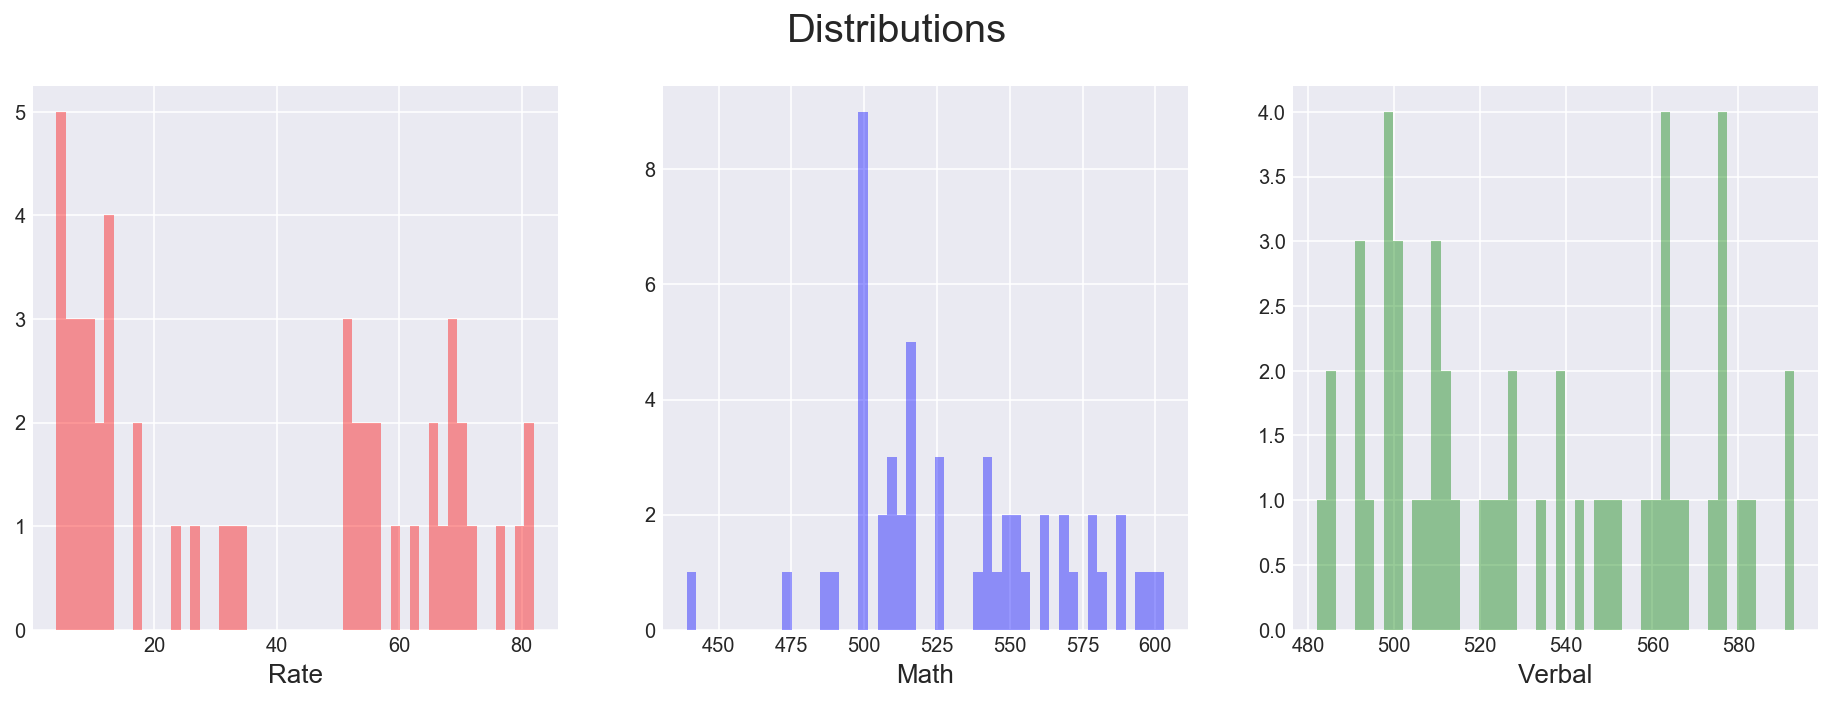

In [9]:
sns.set_style("ticks")
plt.style.use('seaborn-darkgrid')

figuresize = (16, 5)
fig, ax = plt.subplots(1,3, figsize=figuresize)
a1 = sns.distplot(df['Rate'], bins=50, kde=False, ax=ax[0], color='red')
a1.set_xlabel('Rate', fontsize=13)
a2 = sns.distplot(df['Math'], bins=50, kde=False, ax=ax[1], color='blue')
a2.set_xlabel('Math', fontsize=13)
a3 = sns.distplot(df['Verbal'], bins=50, kde=False, ax=ax[2], color='green')
a3.set_xlabel('Verbal', fontsize=13)

plt.suptitle('Distributions', fontsize=20)
#plt.tight_layout()

Text(0.5,1,u'Distribution of Rate')

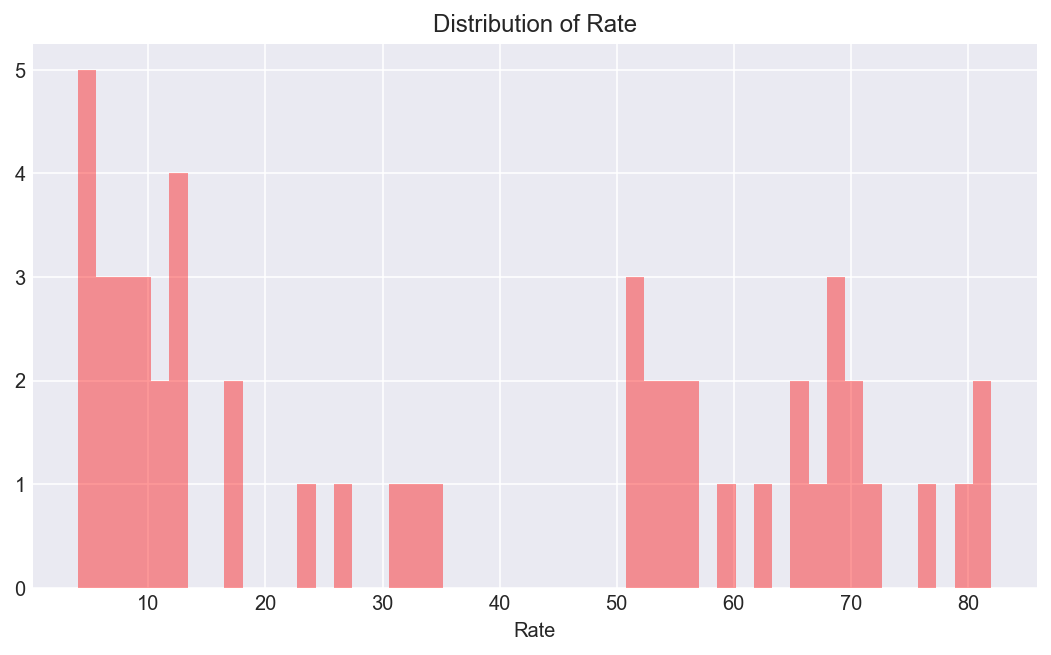

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Rate'], bins=50, kde=False, color='red')
ax.set_title('Distribution of Rate')

Text(0.5,1,u'Distribution of Math')

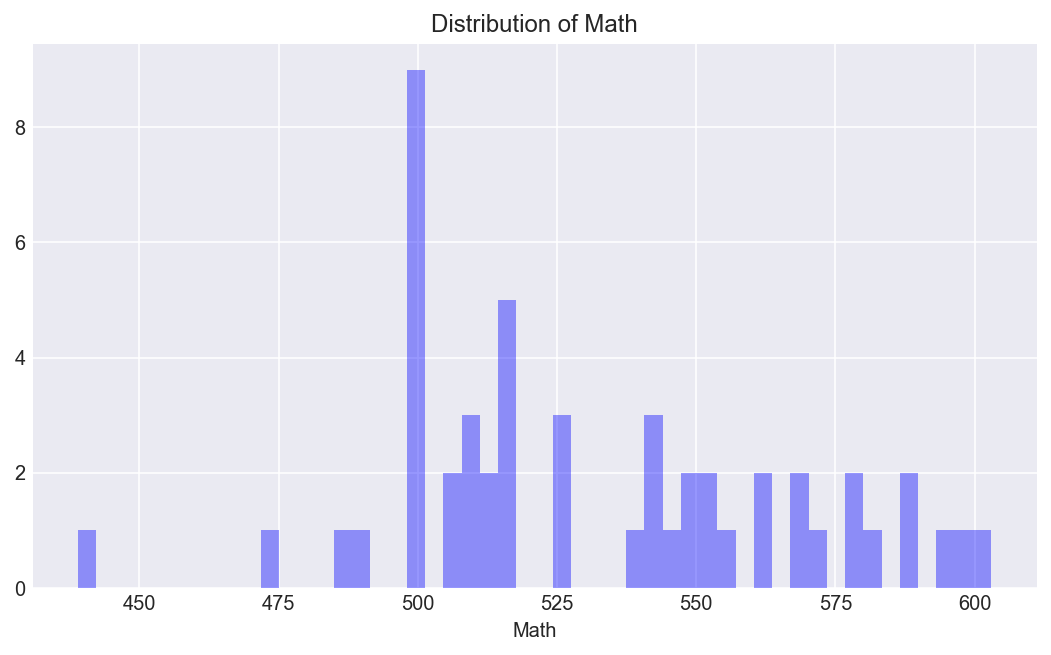

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Math'], bins=50, kde=False, color='blue')
ax.set_title('Distribution of Math')

Text(0.5,1,u'Distribution of Verbal')

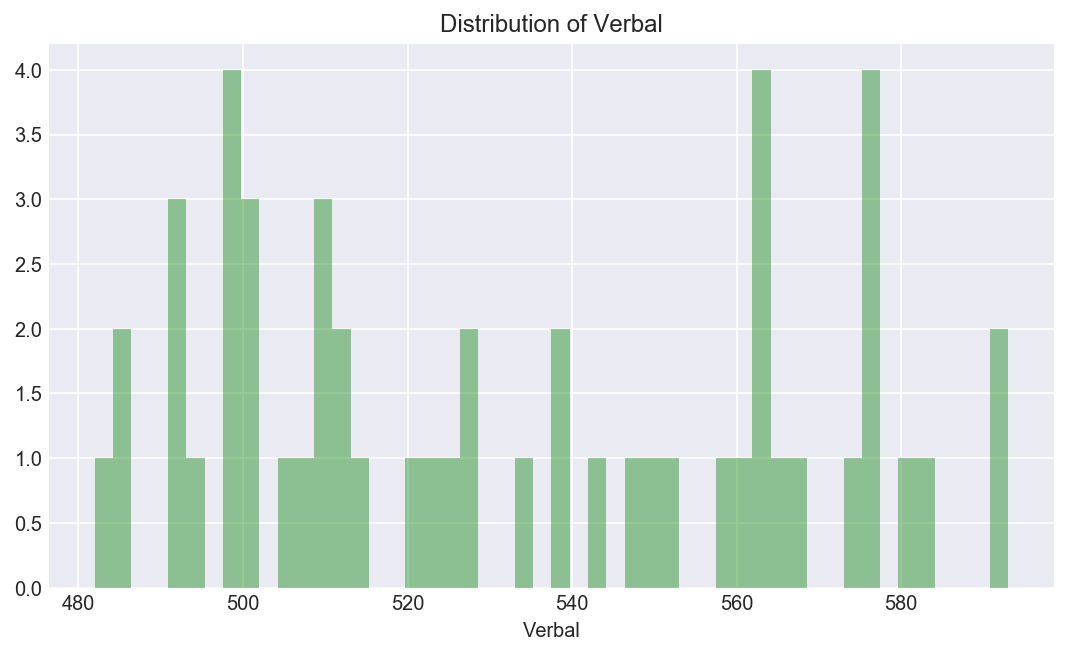

In [12]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.distplot(df['Verbal'], bins=50, kde=False, color='green')
ax.set_title('Distribution of Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

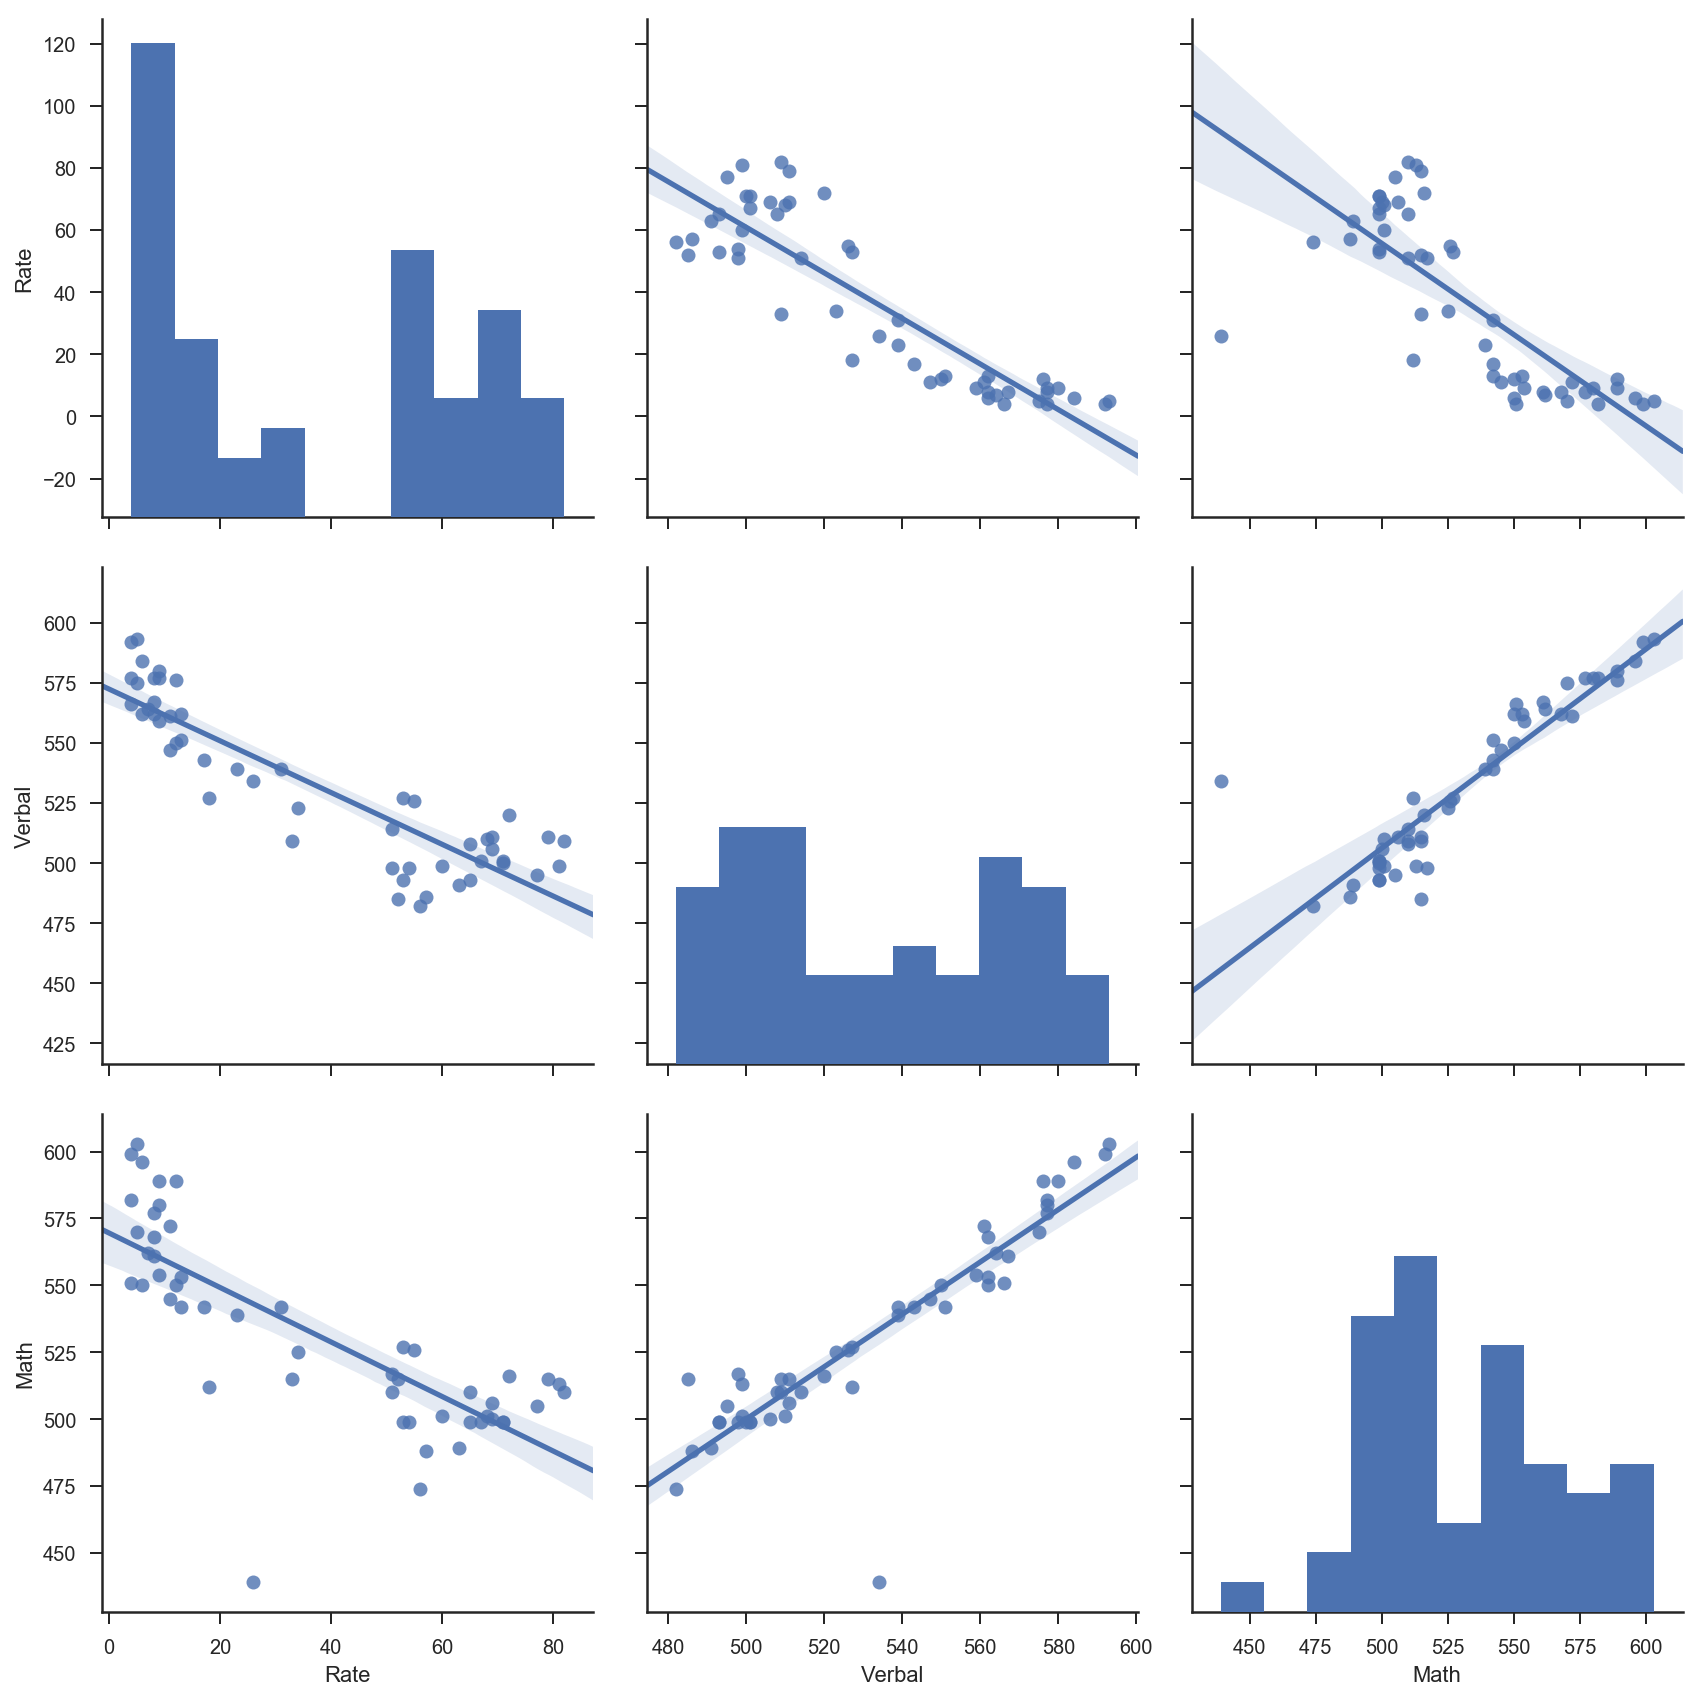

In [13]:
sns.set(style="ticks", color_codes=True)

ax = sns.pairplot(df, size=4, kind="reg") #ADJUST TICKS AND LABELS AND COLORS

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [14]:
#ax = df.plot(kind='bar', stacked=True, figsize=(16, 8))

Text(0,0.5,u'Frequency')

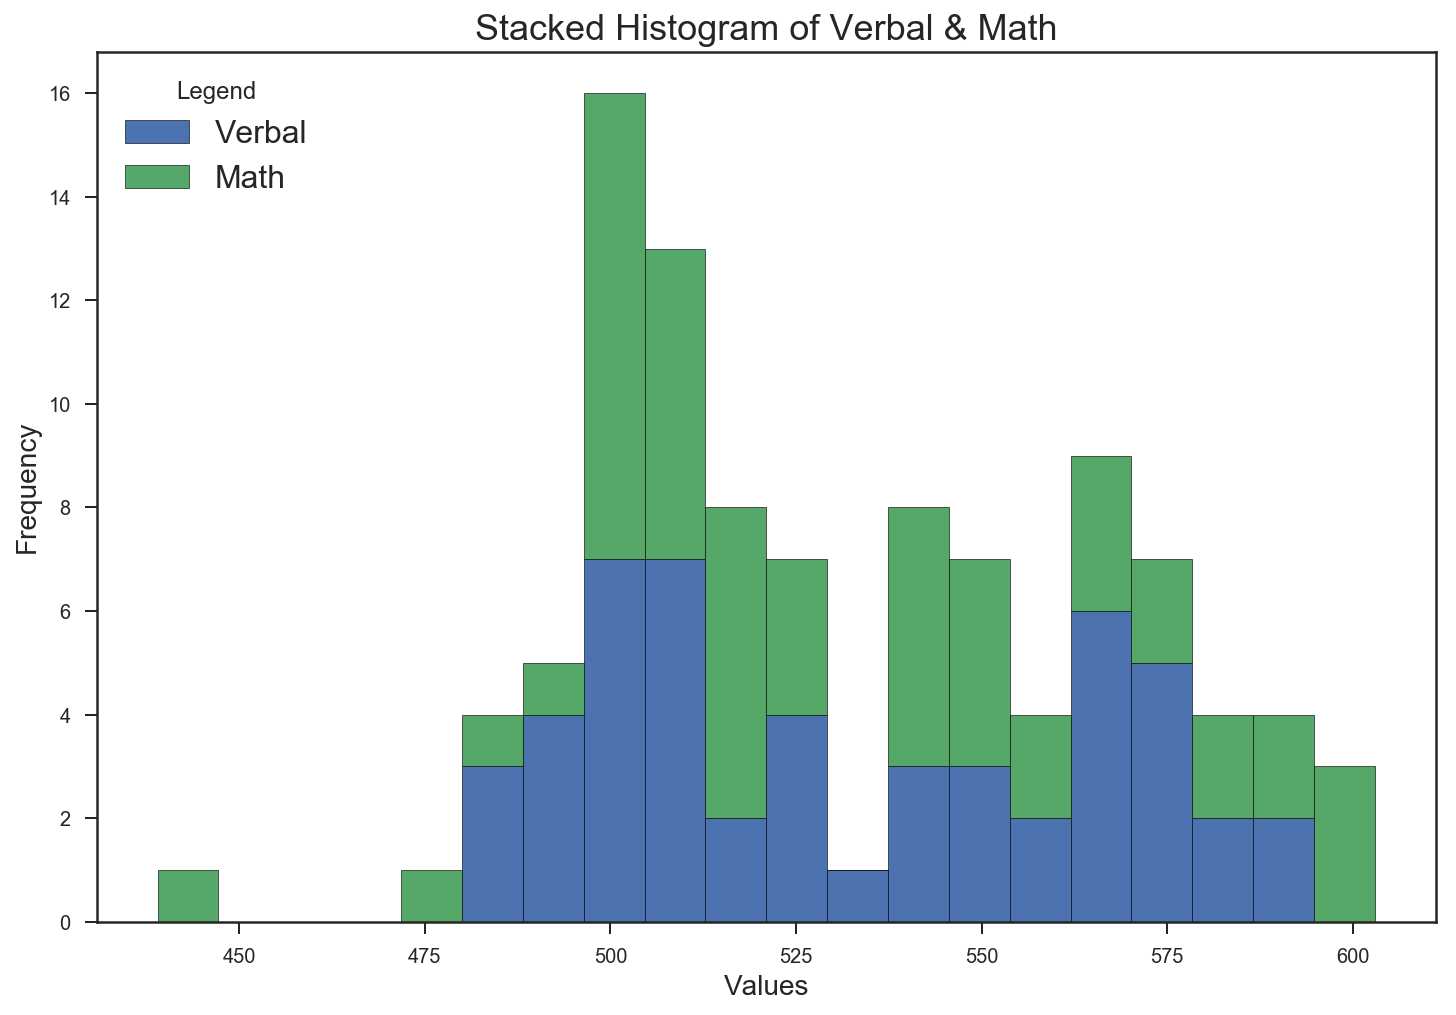

In [15]:
plt.style.use('seaborn-ticks')
ax = df[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(12, 8), bins=20, edgecolor='black')
ax.set_title('Stacked Histogram of Verbal & Math', fontsize=18)
ax.legend(title='Legend', loc='upper left', prop={'size': 16})
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0,0.5,u'Values')

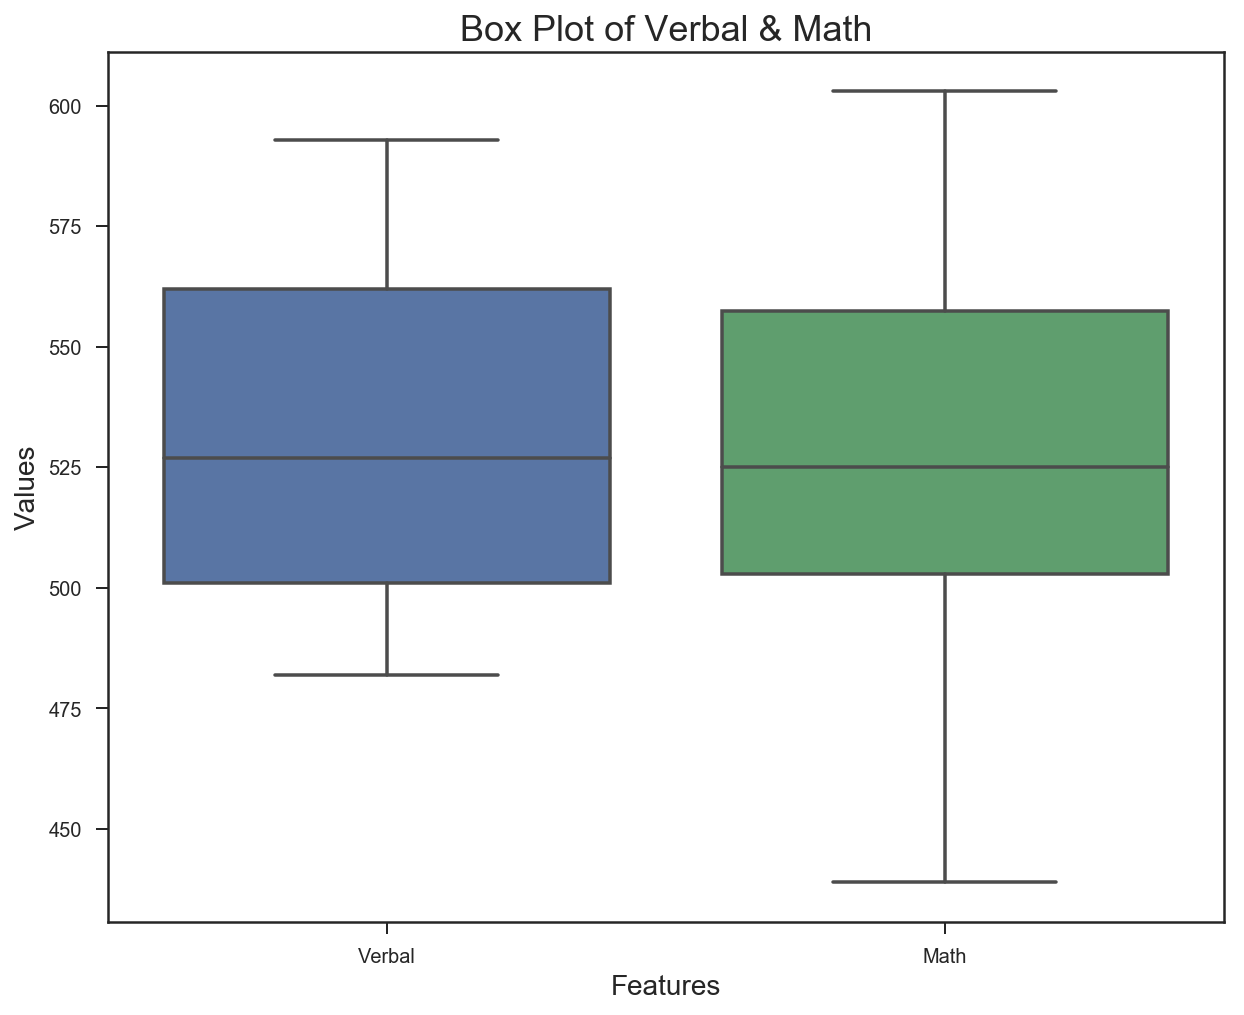

In [16]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,8))

#ax = df[['Verbal', 'Math']].plot(kind='box',figsize=(12, 8))

ax = sns.boxplot(data=df[['Verbal', 'Math']])
ax.set_title('Box Plot of Verbal & Math', fontsize=18)

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Values',fontsize=14)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


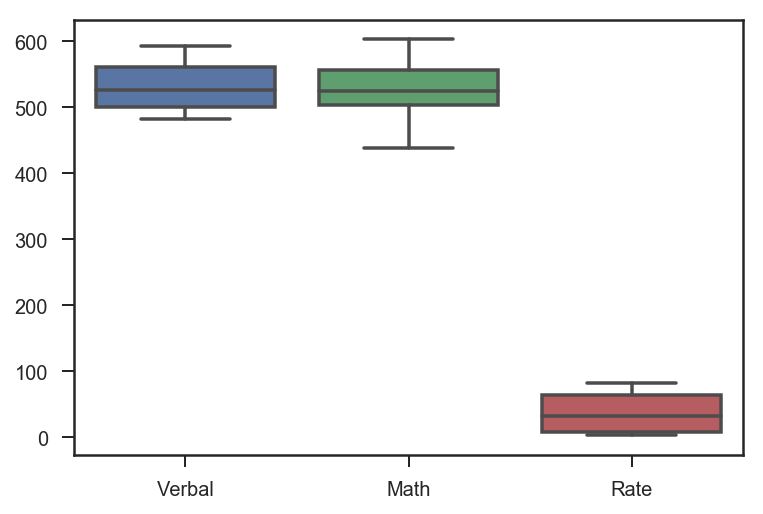

In [17]:
#IF we just plotted the data As-Is
sns.boxplot(data=df[['Verbal', 'Math', 'Rate']])

# 1) The Scales of the data dont match.
# 2) Rate is a Percentage (Will never have a % more than 100)
# 3) We have to adjust the scales to compare things logically & visually

In [18]:
#Normalize everything using Min Max [0-1] - As the data has almost no outliers.
df_norm = df[['Rate', 'Verbal', 'Math']]
df_norm = ((df_norm - df_norm.min())/(df_norm.max()-df_norm.min()))

Text(0,0.5,u'Normalized Values')

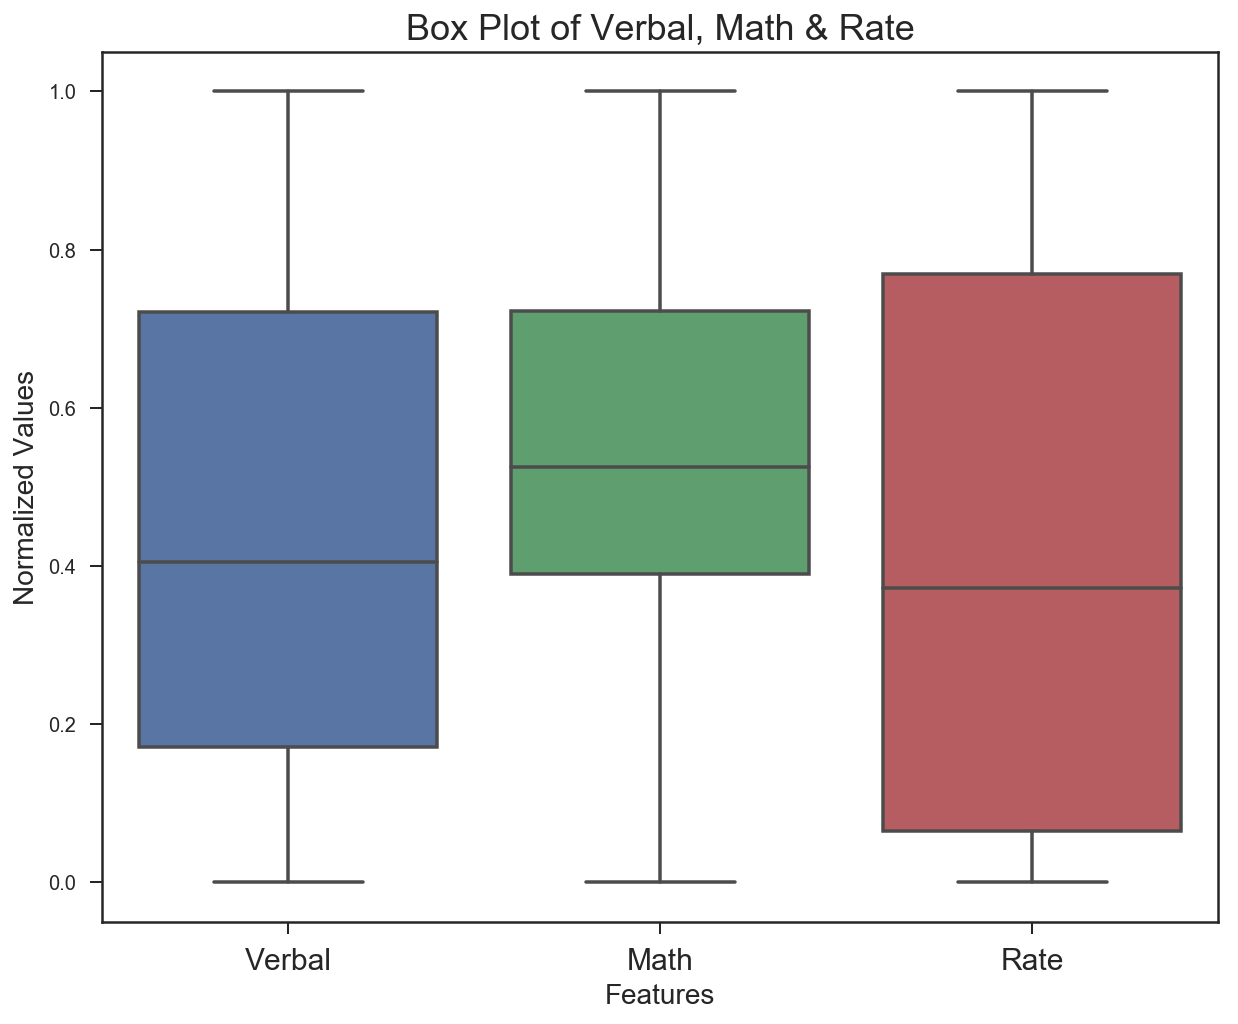

In [19]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,8))

#ax = df[['Verbal', 'Math']].plot(kind='box',figsize=(12, 8))

ax = sns.boxplot(data=df_norm[['Verbal', 'Math', 'Rate']])
ax.set_title('Box Plot of Verbal, Math & Rate', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_xticklabels(['Verbal','Math','Rate'], fontsize=15)
ax.set_ylabel('Normalized Values',fontsize=14)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
abv_mean = df[df['Verbal'] > df['Verbal'].mean()].count()[0]

print('{0} states are above the mean.'.format(abv_mean))

#Given that we have 51 states, the mean at 24 indicates that the data is symmetrical
# -> Looking at the distribution above, we see a bimodal distribution

24 states are above the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
abv_med = df[df['Verbal'] > df['Verbal'].median()].count()[0]

print('{0} states are above the median.'.format(abv_med))

#Given that we have 51 states, the mean at 24 indicates that the data is symmetrical
# -> Looking at the distribution above, we see a bimodal distribution

24 states are above the median.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
df['Verbal - Math'] = df['Verbal']-df['Math']

df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
## +VE Difference

df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=False).head(10)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15
45,AR,12
31,TN,9
9,VA,9
32,NM,9
16,DC,8
8,ME,6
41,OK,6


In [24]:
## -VE DIFFERENCE

df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=True).head(10)

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14
33,IL,-13
44,WI,-12
36,MI,-11
3,NY,-10
47,IA,-10
37,MN,-9
49,ND,-7


In [25]:
pos_diff = df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=False).head(3)
pos_diff

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [26]:
neg_diff = df[['State','Verbal - Math']].sort_values(by='Verbal - Math', ascending=True).head(3)
neg_diff

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
df.corr() ##DEFAULT METHOD IS PEARSON // STATE AUTO EXCLUDES AS IT IS A SERIES OF STRINGS

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


#### Math and Verbal have the strongest correlation

#### The values of the the correlation matrix - shows the 'relatedness' of the variables


Text(64,0.5,u'Features')

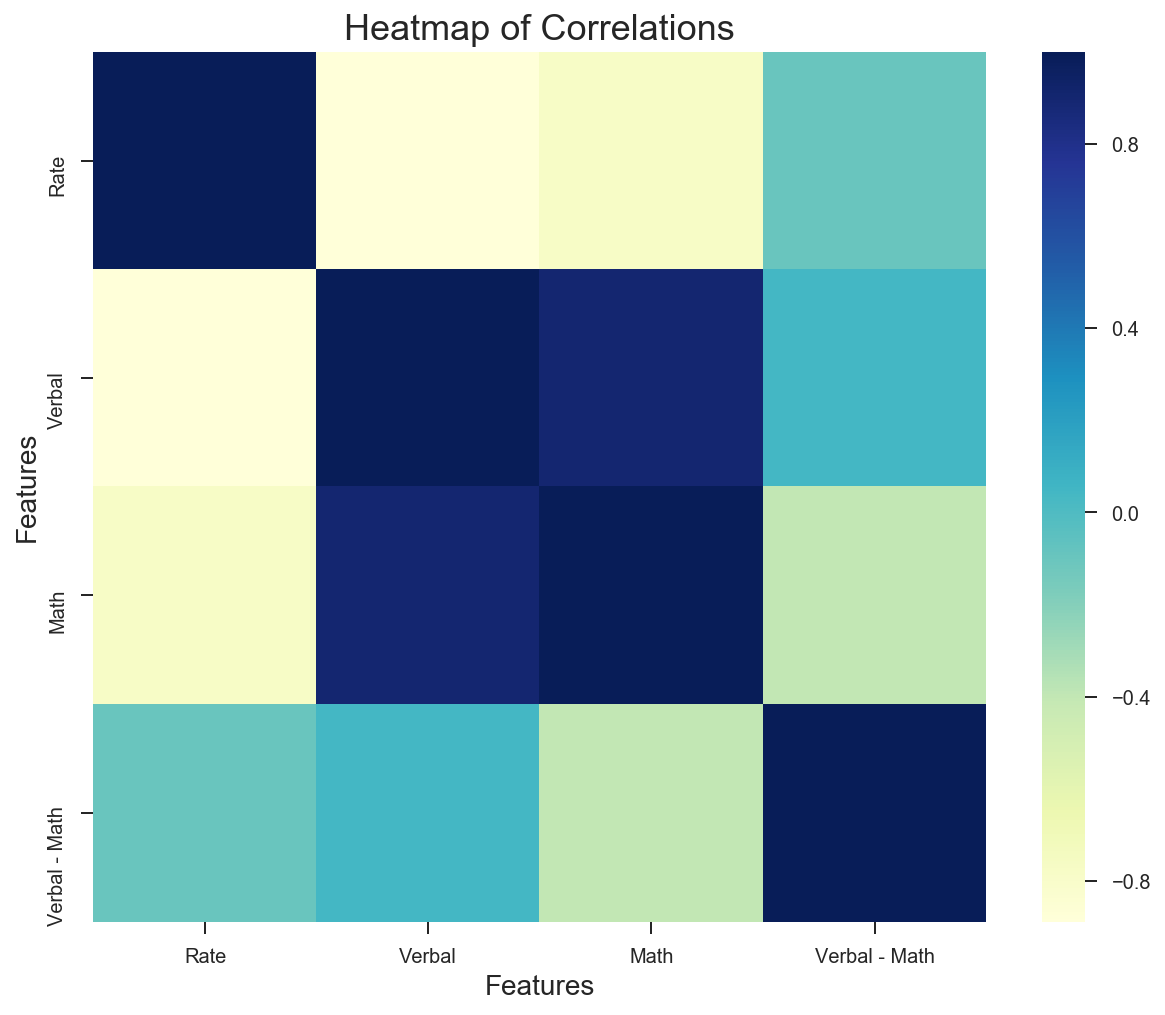

In [28]:
#### HEATMAP VIZ OF CORRELATIONS #####
plt.figure(figsize=(10,8))
ax = sns.heatmap(data=df.corr(), cmap="YlGnBu")
ax.set_title('Heatmap of Correlations', fontsize=18)

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features',fontsize=14)

## Dark Blue = Stronger (see color scale legend on the right)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
df.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<ol>
    <li><b>Count</b> : Count of the rows / observations</li>
    <li><b>Mean</b> : The average of the values in the column</li>
    <li><b>Std</b> : The standard deviation of the values in the column</li>
    <li><b>Min</b> : The minimun / smallest value in the column</li>
    <li><b>25%</b> : The first quartile of the values in the column</li>
    <li><b>50%</b> : The median of the values in the column</li>
    <li><b>75%</b> : The third quartile of the values in the column</li>
    <li><b>Max</b> : The maximum / largest value in the column</li>
</ol>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
df_cov_matrix = df.cov()
df_cov_matrix

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


<ol>
<li>Both are similar as they measure the degree of association between <span style="text-decoration: underline;">two</span> random variables.
<ul>
<li>
<h4>Covariance measures how much two random variables&nbsp;<strong>vary&nbsp;together</strong></h4>
</li>
<li><strong>Correlation&nbsp;measure of how things are related.<br /></strong></li>
</ul>
</li>
<li>Converting Covariance to Correlation:<br />
<ul>
<li>
<h4>Correlation, takes the Covariance and normalizes it with the standard deviations of the variables. The original units of the variable are normalized.</h4>
</li>
<li><img src='pearsoncorr.png', align=left, style="width: 30%; height: 30%"><br /></li>
</ul>
</li>
<li>Why is it preferred?
<ul>
<li>
<h4>The units of measure for Correlation range from -1 to 1, whereas the range for Covariance is -&infin; to&nbsp;&infin;</h4>
</li>
<li>
<h4>Correlation is alot more interpretable compared to Covariance</h4>
</li>
</ul>
</li>
</ol>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
drugs_csv = pd.read_csv('drug-use-by-age.csv')
df_drugs = pd.DataFrame(drugs_csv)

In [71]:
df_drugs.sample(10)


,age,n,alcoholuse,alcoholfrequency,marijuanause,marijuanafrequency,cocaineuse,cocainefrequency,crackuse,crackfrequency,...,oxycontinuse,oxycontinfrequency,tranquilizeruse,tranquilizerfrequency,stimulantuse,stimulantfrequency,methuse,methfrequency,sedativeuse,sedativefrequency
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


In [33]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

<font size=3>
    <b>Looking at the features we have:</b>
    <ol>
        <li>Age - Includes a range, consider it more of a categorical</li>
        <li>n - the amount of observations</li>
        <li>Observation by drug in 2 types (categories?)
            <ul>
              <li>Usage</li>
              <li>Frequency</li>
            </ul>
        </li>
        <li>Dataset is already a summary</li>
    </ol>
</font>
<font size=3>
    <b>Going through the dataset:</b>
    <ol>
        <li>Column data: No Null Values but has '-'</li>
        <li>Inspect all Object columns</li>
        <li>Yes, it needs cleaning: Replace '-' with 0 >> NaNs will disrupt the descriptives</li>
        <li>Age Range is a good axis to plot against</li>
        <li>Does correlation really matter here since it is a summary? - Have to check Cov and Corr</li>
    </ol>
</font>

In [34]:
# CHANGE COL NAMES
col_names = df_drugs.columns.tolist()
# List replacement method
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase

df_drugs.columns = [''.join([c.lower() for c in column if c in uppercase+lowercase]) for column in df_drugs.columns]

In [35]:
to_clean = ['oxycontinfrequency','methfrequency','inhalantfrequency','heroinfrequency','crackfrequency','cocainefrequency']

In [36]:
# REMOVE ALL '-'
def convert_dash_to_zero(x):
    if x == '-':
        x = 0
    return x

for col_name in to_clean:
    df_drugs[col_name] = df_drugs[col_name].apply(convert_dash_to_zero)
    #CONVERT TO ASTYPE FLOAT
    df_drugs[col_name] = df_drugs[col_name].astype(float)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

#### START HERE

<p><span style="text-decoration: underline;"><strong>From an overview of the columns in the dataset:</strong></span></p>
<ul>
<li>Apart from the age and n column, there rest were types of drugs split by use and frequency.</li>
<li>The dataset was then split into 2 segments (or Dataframes):
<ol>
<li>Drugs Use</li>
<li>Drugs Frequency</li>
</ol>
</li>
</ul>

In [37]:
## 2 GROUPS - USE & FREQUENCY
df_drugs_use = df_drugs.loc[:,df_drugs.columns.str.contains('use')].copy()
df_drugs_freq = df_drugs.loc[:,df_drugs.columns.str.contains('freq')].copy()
#ADD AGE
df_drugs_use.loc[:,'age'] = df_drugs.age
df_drugs_freq.loc[:,'age'] = df_drugs.age

In [38]:
## SET STYLE
plt.style.use('seaborn-darkgrid')

In [39]:
df_drugs_use.describe()

,alcoholuse,marijuanause,cocaineuse,crackuse,heroinuse,hallucinogenuse,inhalantuse,painreleiveruse,oxycontinuse,tranquilizeruse,stimulantuse,methuse,sedativeuse
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


<p><strong><span style="text-decoration: underline;">Drugs Use:</span></strong></p>
<ul>
<li>On the description;
<ol>
<li>Alcohol and Marijuana have the highest means and standard deviations</li>
<li>Visualized with the boxplot to see it in comparison to the other drugs use</li>
<li><span style="text-decoration: underline;">It showed that Alcohol and Marijuana have the highest usage vs the rest.</span></li>
</ol>

Text(0,0.5,u'Usage')

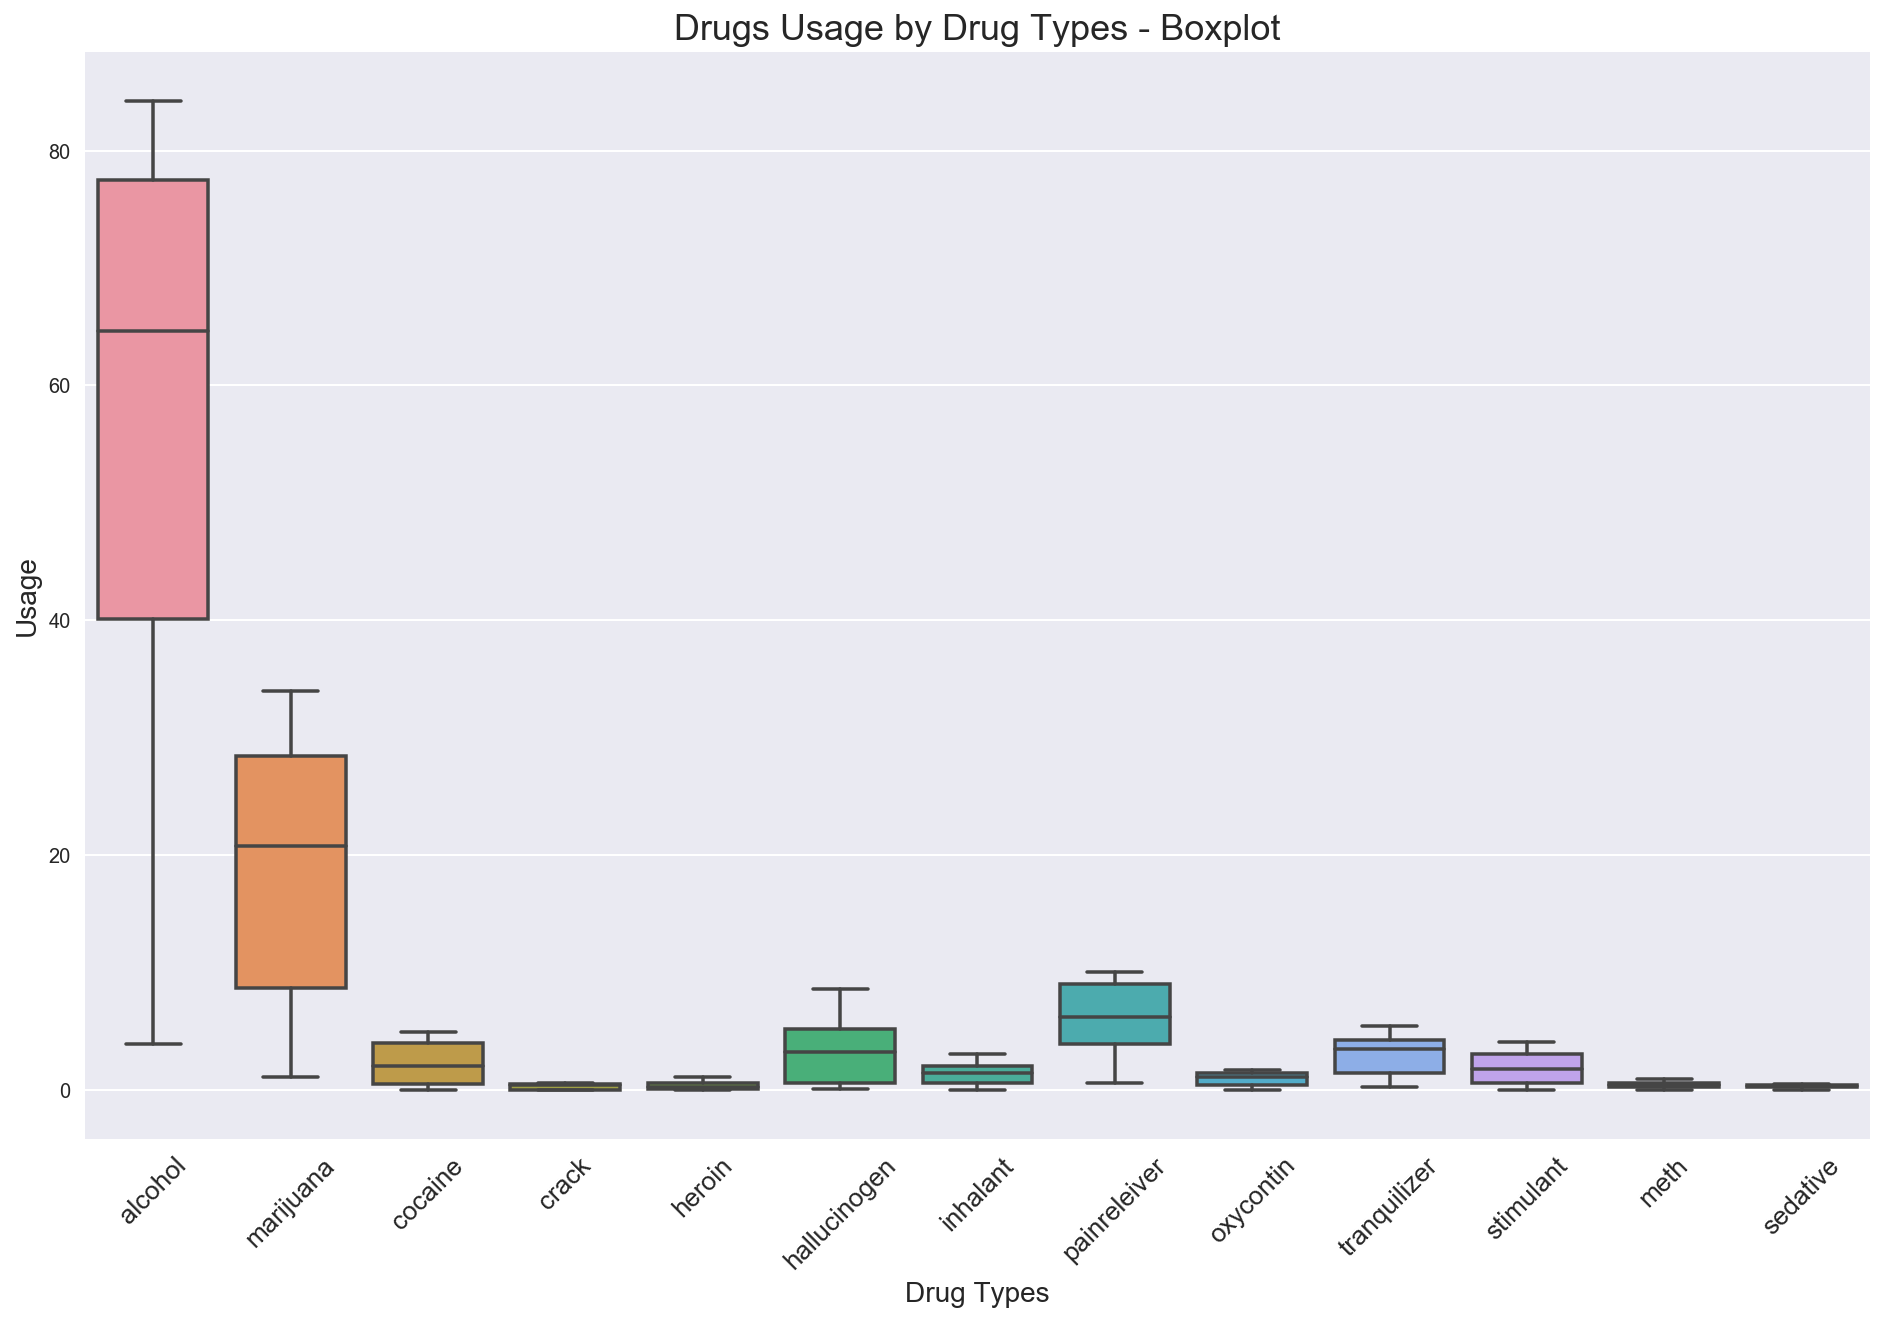

In [40]:
## BOXPLOT TO SEE DRUG USE
plt.figure(figsize=(16,10))
ax = sns.boxplot(data=df_drugs_use)

x = df_drugs_use.columns.str.replace('use','')
# create an index for each tick position
xi = [i for i in range(0, len(x)-1)]
plt.xticks(xi, x)
plt.xticks(rotation=45, fontsize=13)
ax.set_title('Drugs Usage by Drug Types - Boxplot', fontsize=18)
ax.set_xlabel('Drug Types', fontsize=14)
ax.set_ylabel('Usage',fontsize=14)

From the boxplot visual - Drugs Usage by Drug Types:
<ul>
<li><strong>We could infer that Alcohol seems to be the top choice for drug types followed by Marijuana</strong></li>
</ul>

<p>Other Drugs that may warrant further exploration:</p>
<ol>
    <li>Cocaine</li>
    <li>Hallucinogen</li>
    <li>Painreleiver</li>
    <li>Tranquilizer</li>
    <li>Stimulant</li>
</ol>


In [41]:
df_drugs_freq.describe()

,alcoholfrequency,marijuanafrequency,cocainefrequency,crackfrequency,heroinfrequency,hallucinogenfrequency,inhalantfrequency,painreleiverfrequency,oxycontinfrequency,tranquilizerfrequency,stimulantfrequency,methfrequency,sedativefrequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


<p><strong><span style="text-decoration: underline;">Drugs Frequency:</span></strong></p>
<ul>
<li>On the description;
<ol>
<li>Heroin has highest mean, however..</li>
<li>Stimulant had the highest standard deviation</li>
<li>Visualized with the boxplot to see it in comparison to the other drugs frequency</li>
<li><span style="text-decoration: underline;">From the usage Alcohol and Marijuana were noted to be the highest, however in the frequency we see Heroin and Meth popup.</span></li>
</ol>
</li>

Text(0,0.5,u'Frequency')

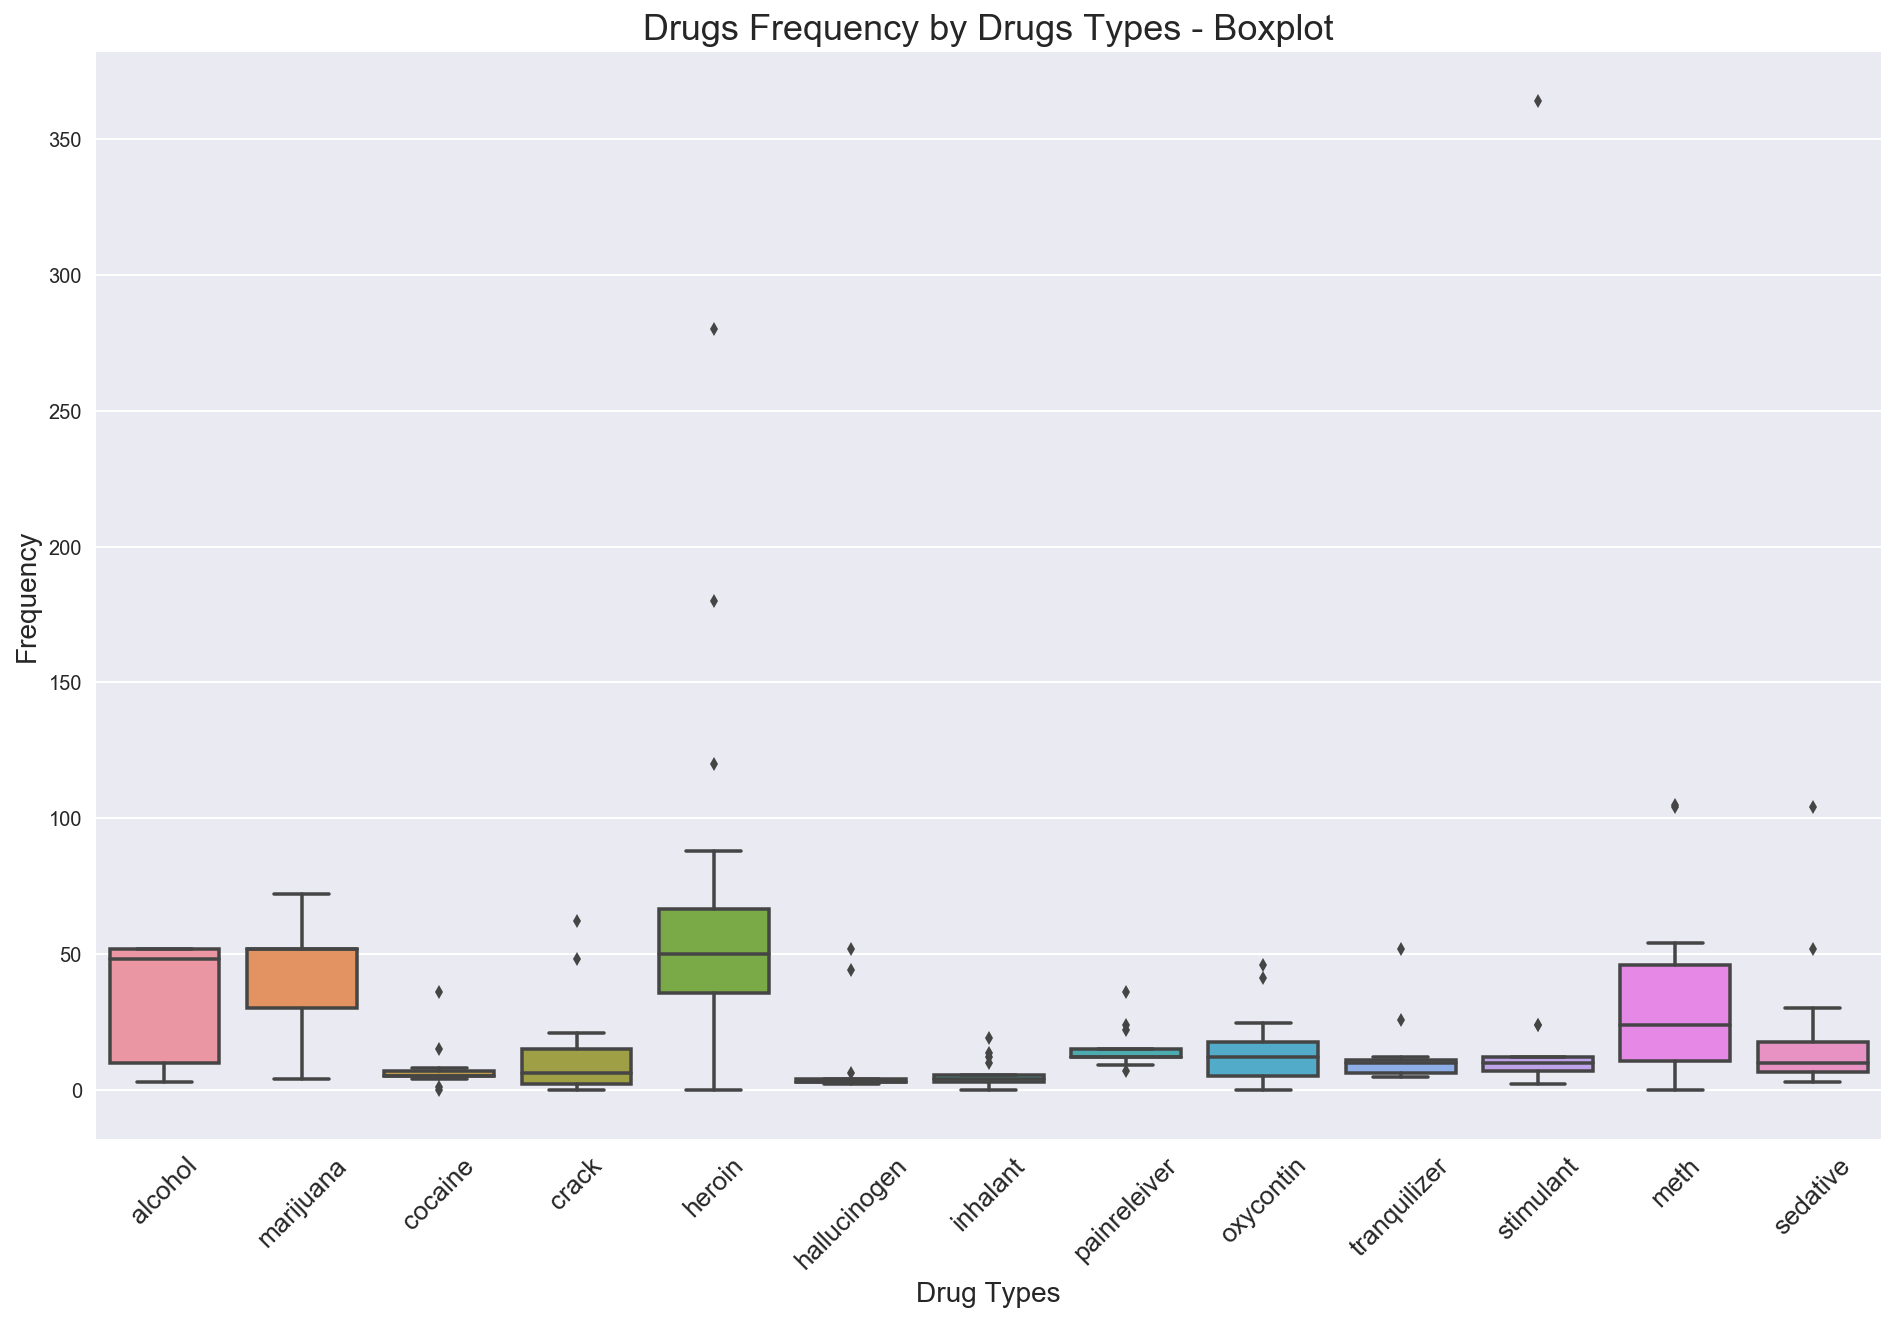

In [42]:
## BOXPLOT TO SEE DRUG FREQ
plt.figure(figsize=(16,10))
ax = sns.boxplot(data=df_drugs_freq)
x = df_drugs_freq.columns.str.replace('frequency','')
# create an index for each tick position
xi = [i for i in range(0, len(x)-1)]
plt.xticks(xi, x)
plt.xticks(rotation=45, fontsize=13)
ax.set_title('Drugs Frequency by Drugs Types - Boxplot', fontsize=18)
ax.set_xlabel('Drug Types', fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

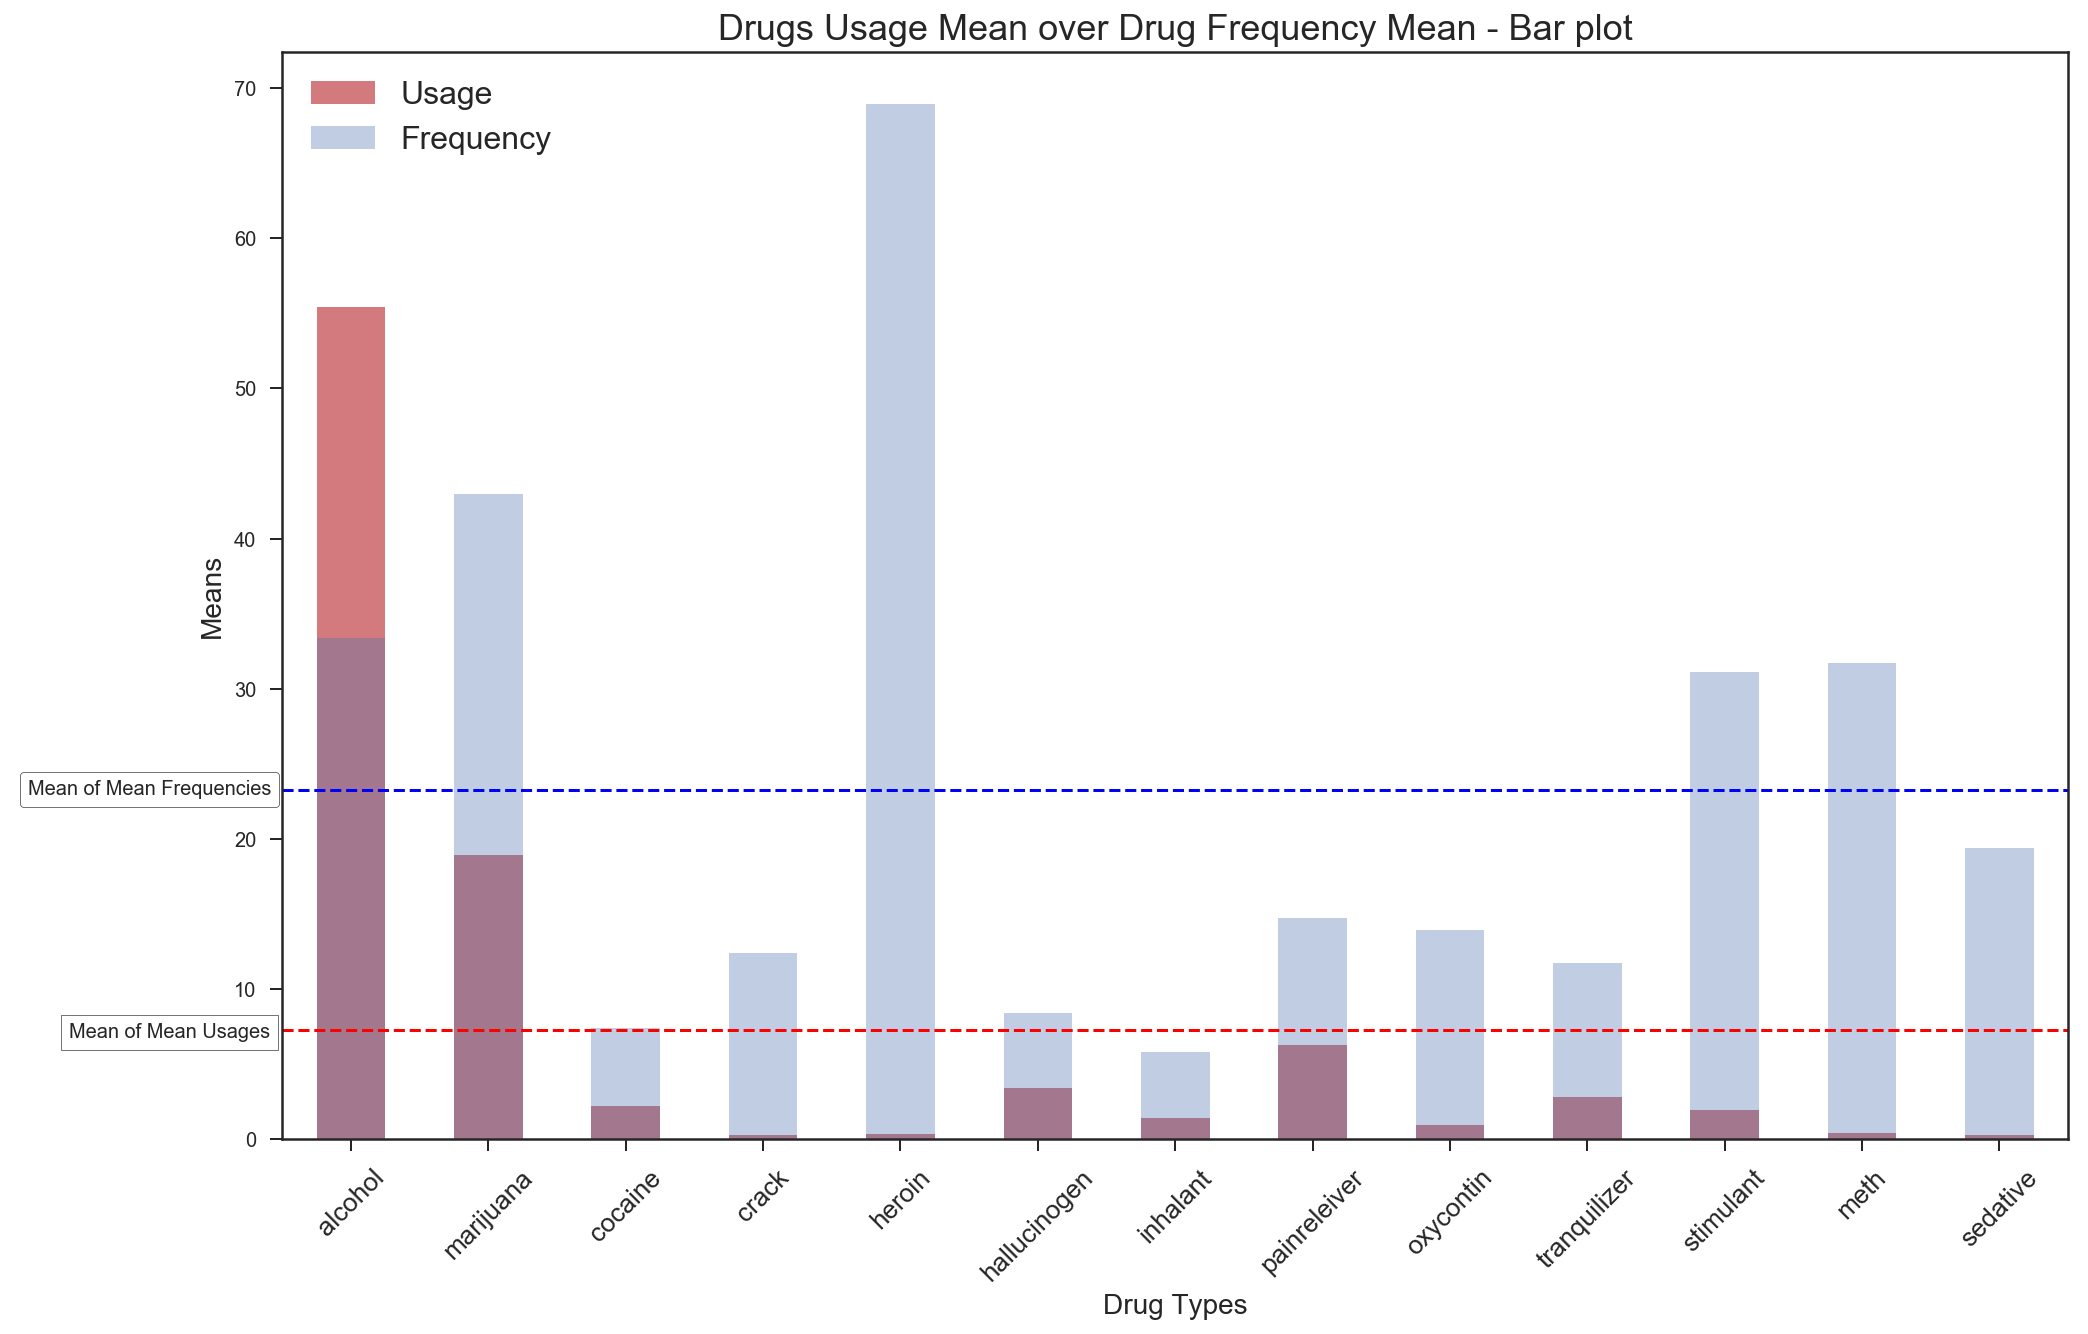

In [44]:
## STACKED BARPLOT TO SEE DRUG USE AND FREQ
## SET STYLE
plt.style.use('seaborn-ticks')
ax = df_drugs_use.drop(['age'], axis=1).mean().plot(kind='bar',figsize=(16,10), color='r', alpha=0.75)
ax = df_drugs_freq.drop(['age'], axis=1).mean().plot(kind='bar',figsize=(16,10), color='b', alpha=0.35)
x = df_drugs_use.columns.str.replace('use','')
# create an index for each tick position
xi = [i for i in range(0, len(x)-1)]
plt.xticks(xi, x)
plt.xticks(rotation=45, fontsize=13)
ax.set_title('Drugs Usage Mean over Drug Frequency Mean - Bar plot', fontsize=18)
ax.set_xlabel('Drug Types', fontsize=14)
ax.set_ylabel('Means',fontsize=14)
ax.legend(loc='upper left', prop={'size': 16}, labels=['Usage','Frequency'])

#Mean Line
plt.axhline(y=df_drugs_use.drop(['age'], axis=1).mean().mean(), linewidth=1.5, color = 'red', ls="--", )
plt.axhline(y=df_drugs_freq.drop(['age'], axis=1).mean().mean(), linewidth=1.5, color = 'blue', ls="--", )

from matplotlib.offsetbox import AnchoredText
at = AnchoredText("Mean of Mean Frequencies",
                  prop=dict(size=10), frameon=True,
                  loc=6,bbox_to_anchor=(10, 545),
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

at2 = AnchoredText("Mean of Mean Usages",
                  prop=dict(size=10), frameon=True,
                  loc=6,bbox_to_anchor=(51, 302),
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

ax.add_artist(at)
ax.add_artist(at2)

<p><strong>Baselines</strong></p>
<ul>
<li>High Usage = Higher than the mean of drug usage means</li>
<li>High Freq = Higher than the mean of drug frequency means</li>
<li>All Drugs are subject to its availability, costs &amp; accessibility, which may affect its usage and frequency.</li>
</ul>
<p><strong>High Usage + High Freq (Many users, often)</strong></p>
<ol>
<li>Alcohol
<ul>
<li>Usage surpasses its frequency</li>
<li>Might bebecause because of availability &amp; accessibility</li>
</ul>
</li>
<li>Marijuana
<ul>
<li>Similarly to alcohol, might be because of availability &amp; accessibility</li>
</ul>
</li>
</ol>
<p><strong>High Frequency + Low Usage&nbsp;(Many users, Not often)</strong></p>
<ol>
<li>Heroin<br />
<ul>
<li>Abuse / Addiction potential - as the frequency between its usage and frequency is the largest compared to the other drugs</li>
</ul>
</li>
<li>Stimulant
<ul>
<li>May be a medical use cases as they are mainly prescription drugs (<a title="Drugs!" href="https://www.drugabuse.gov/drugs-abuse/commonly-abused-drugs-charts" target="_blank" rel="noopener">see link</a>)</li>
</ul>
</li>
<li>Meth
<ul>
<li>Abuse / Addiction potential</li>
</ul>
</li>
</ol>

Text(0,0.5,u'Usage')

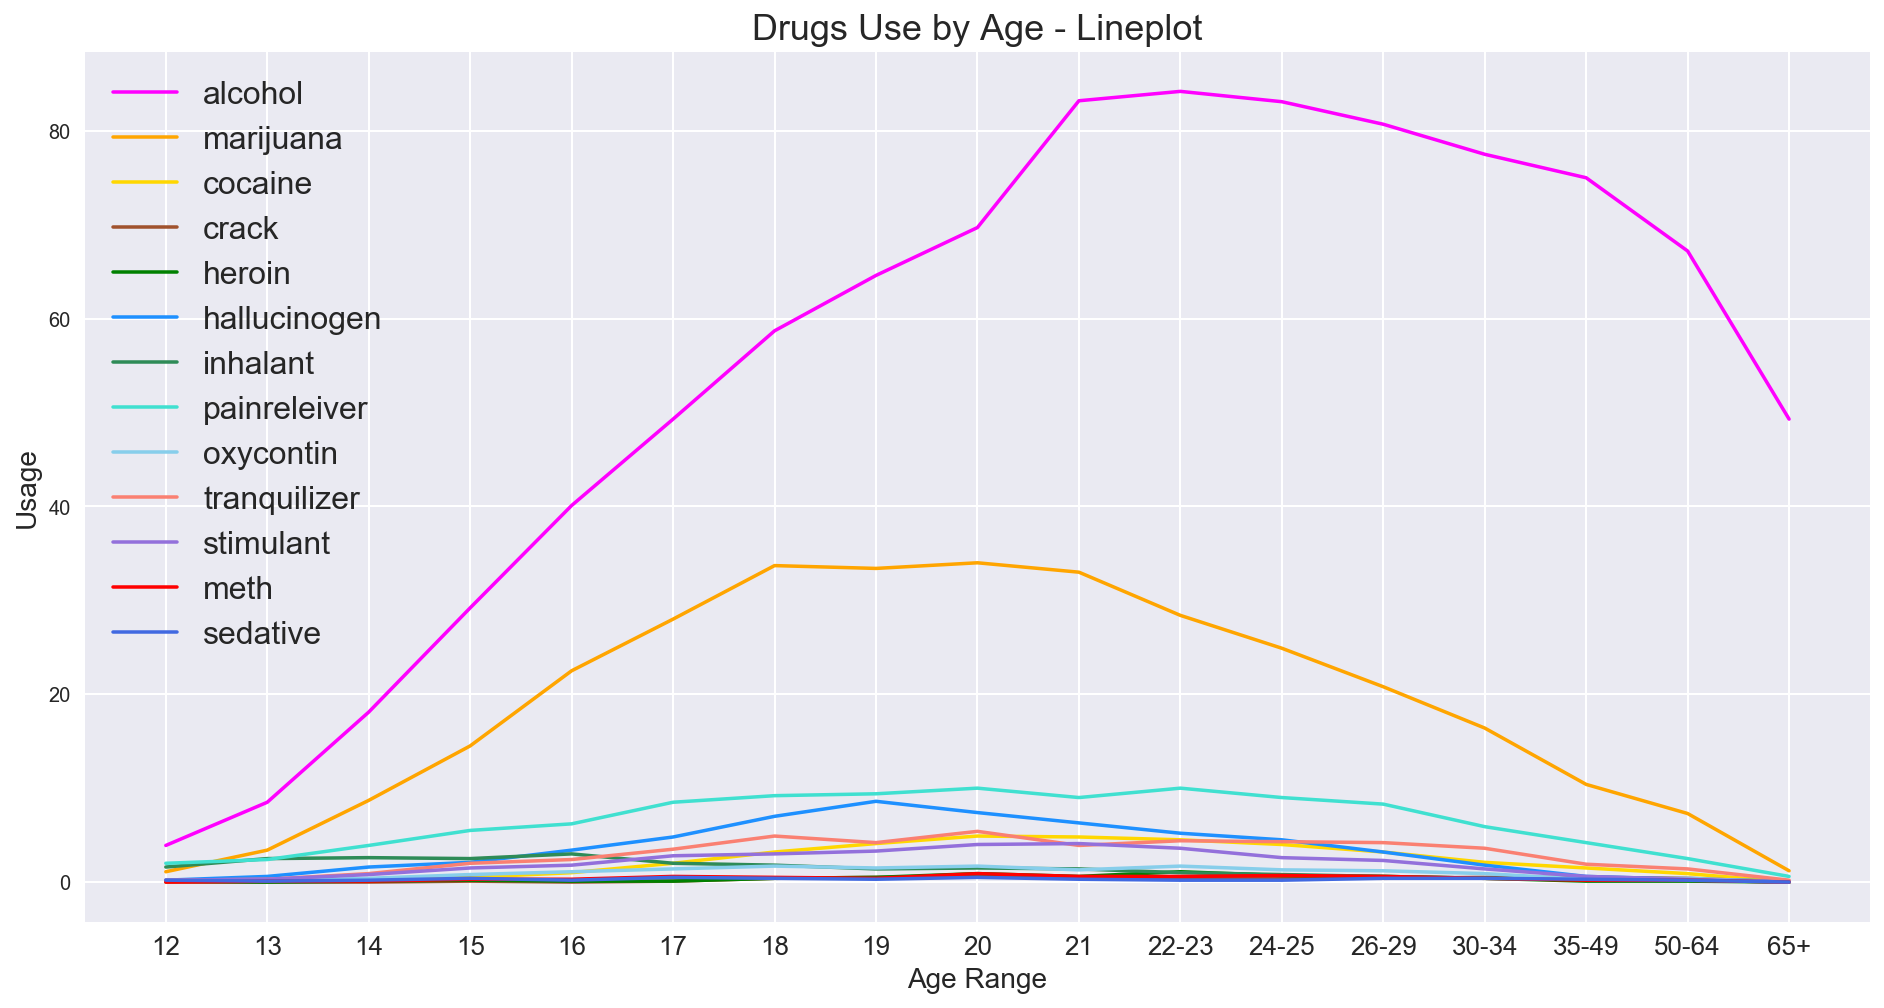

In [45]:
#LINEPLOT FOR DRUG USE ON AGE
plt.style.use('seaborn-darkgrid')
x = df_drugs_use.age.values
# create an index for each tick position
xi = [i for i in range(0, len(x))]

colorset = ['fuchsia','orange','gold','sienna','green','dodgerblue','seagreen','turquoise','skyblue','salmon','mediumpurple','red','royalblue']
ax = df_drugs_use.plot(figsize=(16,8), color=colorset)
plt.xticks(xi, x)
ax.legend(loc='upper left', prop={'size': 16}, labels=df_drugs_use.columns.str.replace('use',''))
plt.xticks(fontsize=13)
ax.set_title('Drugs Use by Age - Lineplot', fontsize=18)
ax.set_xlabel('Age Range', fontsize=14)
ax.set_ylabel('Usage',fontsize=14)

<font size=3>
<b>Even throughout - Drugs Usage over Age, on the Top 3 we see:</b>
    <ol>
        <li>Alcohol, seeing a jump from 20 to 21 could have something to do with the Legal drinking age in the US</li>
        <li>Marijuana, maybe easily available to youngsters like a gateway drug</li>
        <li>Painreleiver</li>
    </ol>
</font>


Text(0,0.5,u'Frequency')

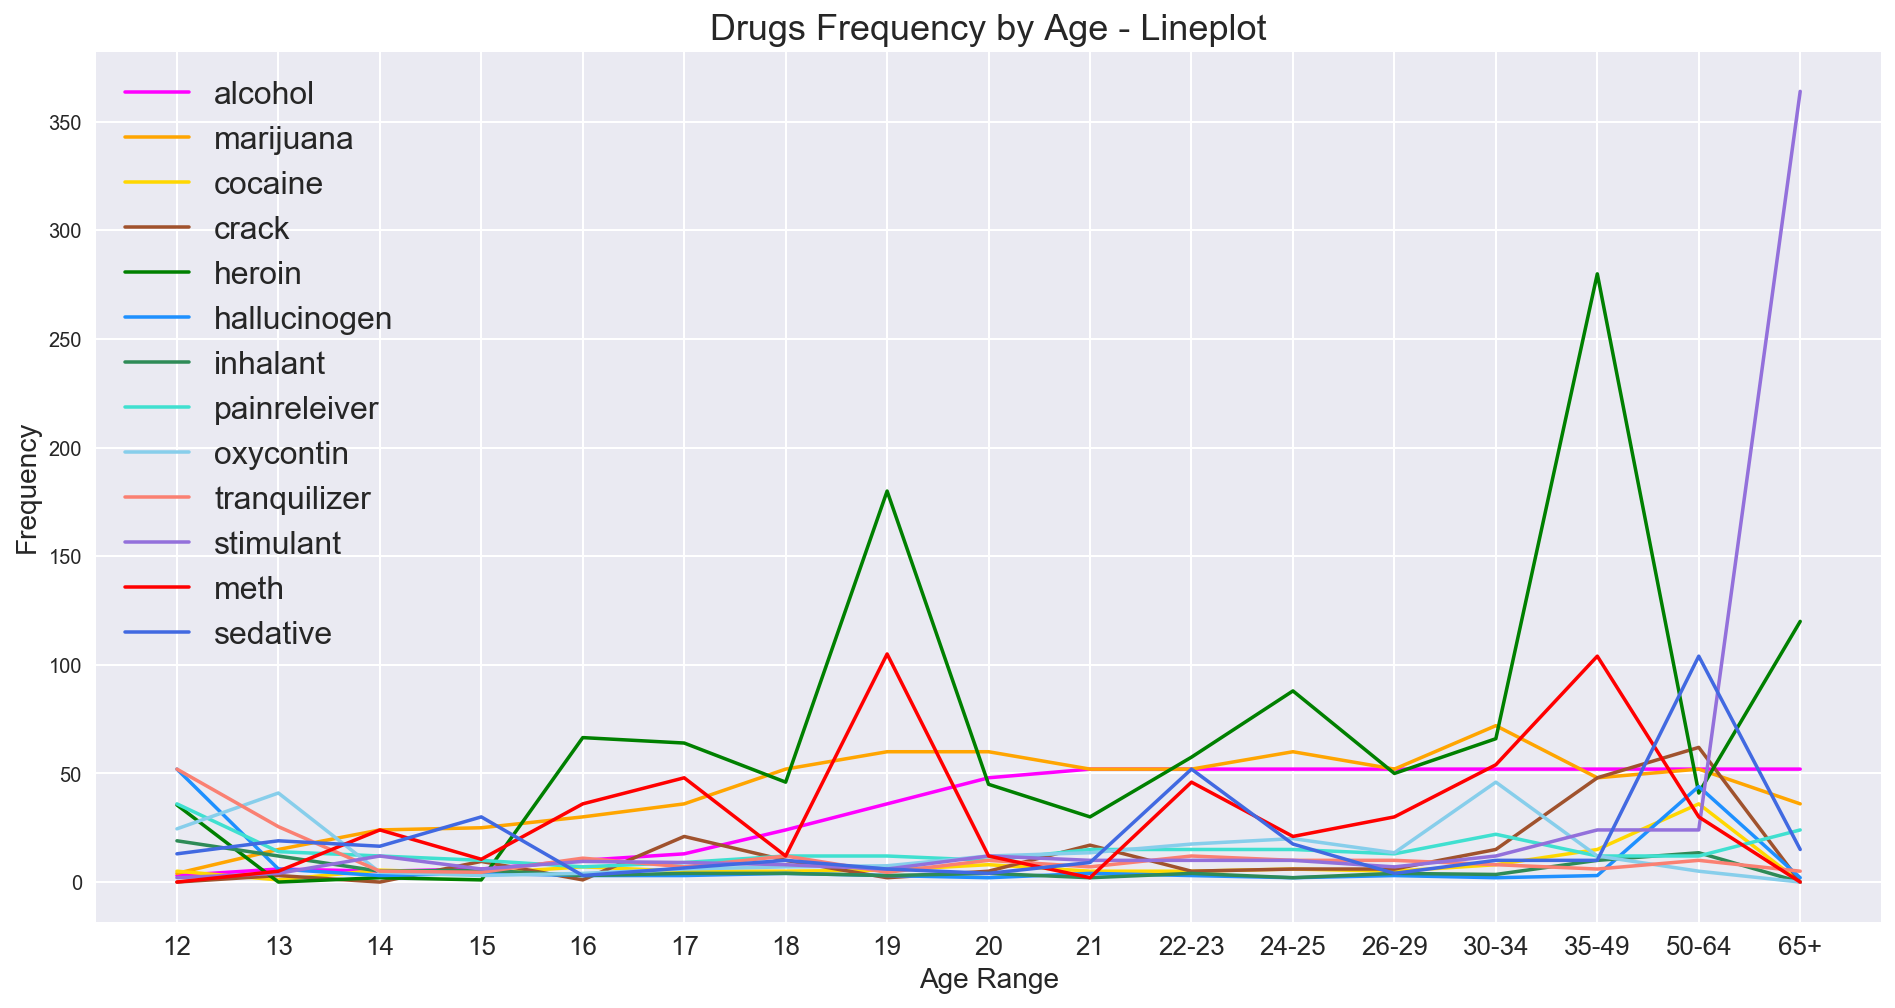

In [46]:
#LINEPLOT FOR DRUG FREQ ON AGE
x = df_drugs_freq.age.values
# create an index for each tick position
xi = [i for i in range(0, len(x))]

colorset = ['fuchsia','orange','gold','sienna','green','dodgerblue','seagreen','turquoise','skyblue','salmon','mediumpurple','red','royalblue']
ax = df_drugs_freq.plot(figsize=(16,8), color=colorset)
plt.xticks(xi, x)
ax.legend(loc='upper left', prop={'size': 16}, labels=df_drugs_freq.columns.str.replace('frequency',''))

plt.xticks(fontsize=13)
ax.set_title('Drugs Frequency by Age - Lineplot', fontsize=18)
ax.set_xlabel('Age Range', fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

<font size=3>
<b>However - Drugs Frequency over Age, paints a slightly different picture</b>
    <ol>
        <li>The few that stand out:
            <ul>
              <li>Heroin</li>
              <li>Alcohol</li>
              <li>Marijuana</li>
              <li>Meth</li>
              <li>Stimulant - towards old age</li>
              <li>Sedative - towards old age too</li>
            </ul>
        </li>
        <li>Heroin Freq overall high</li>
        <li>Stimulant Freq over time, esp after 50</li>
        <li><u>Meth and Heroin similar frequency spikes over age</u></li>
        <li>Alcohol frequency plateaus after 21</li>
    </ol>
</font>


## Conclusion for above:

### 1: Alcohol and Marijuana are the all time favourite drugs of choice, even over age groups. (considering legality,              cost, accessbility and availability)
### 2: Heroin and Meth are the potential top candidates for drug abuse (authorities take note for investigations!)
### 3: Once you hit 50, stimulants seem to be part of life.

In [47]:
# Explore Correlations
df_drugs.drop(['age','n'], axis=1).corr()
#df_drugs.corr()

,alcoholuse,alcoholfrequency,marijuanause,marijuanafrequency,cocaineuse,cocainefrequency,crackuse,crackfrequency,heroinuse,heroinfrequency,...,oxycontinuse,oxycontinfrequency,tranquilizeruse,tranquilizerfrequency,stimulantuse,stimulantfrequency,methuse,methfrequency,sedativeuse,sedativefrequency
alcoholuse,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,0.396779,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcoholfrequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,0.432405,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuanause,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,0.041377,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuanafrequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,0.346001,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaineuse,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,0.128866,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocainefrequency,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,0.143095,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crackuse,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,0.355941,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crackfrequency,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,0.335815,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroinuse,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,-0.044239,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708
heroinfrequency,0.396779,0.432405,0.041377,0.346001,0.128866,0.143095,0.355941,0.335815,-0.044239,1.000000,...,-0.048459,-0.148807,0.070324,-0.264485,-0.051164,0.218212,-0.065298,0.782122,-0.040406,-0.191638


#### More Below..

In [48]:
# USEFUL FUNCTIONS I FOUND ON STACKOVERFLOW

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("------------------------------------------------------------------")
print("Top 10 Correlations in Drug Use")
print("------------------------------------------------------------------")
print(get_top_abs_correlations(df_drugs_use.drop(['age'], axis=1), 10))
print("------------------------------------------------------------------")
print("Top 10 Correlations in Drug Freq")
print("------------------------------------------------------------------")
print(get_top_abs_correlations(df_drugs_freq.drop(['age'], axis=1), 10))
print("------------------------------------------------------------------")

------------------------------------------------------------------
Top 10 Correlations in Drug Use
------------------------------------------------------------------
painreleiveruse  oxycontinuse       0.976445
marijuanause     oxycontinuse       0.971733
                 stimulantuse       0.968096
                 painreleiveruse    0.966226
painreleiveruse  stimulantuse       0.961484
marijuanause     hallucinogenuse    0.959353
painreleiveruse  tranquilizeruse    0.959283
oxycontinuse     tranquilizeruse    0.955081
                 stimulantuse       0.947492
hallucinogenuse  stimulantuse       0.940008
dtype: float64
------------------------------------------------------------------
Top 10 Correlations in Drug Freq
------------------------------------------------------------------
cocainefrequency       crackfrequency           0.872260
hallucinogenfrequency  inhalantfrequency        0.834993
alcoholfrequency       marijuanafrequency       0.818769
heroinfrequency        methfreq

In [49]:
print("------------------------------------------------------------------")
print("Top 30 Correlations in Drugs")
print("------------------------------------------------------------------")
print(get_top_abs_correlations(df_drugs.drop(['age'], axis=1), 30))

------------------------------------------------------------------
Top 30 Correlations in Drugs
------------------------------------------------------------------
painreleiveruse     oxycontinuse          0.976445
marijuanause        oxycontinuse          0.971733
                    stimulantuse          0.968096
                    painreleiveruse       0.966226
painreleiveruse     stimulantuse          0.961484
marijuanause        hallucinogenuse       0.959353
painreleiveruse     tranquilizeruse       0.959283
oxycontinuse        tranquilizeruse       0.955081
                    stimulantuse          0.947492
hallucinogenuse     stimulantuse          0.940008
tranquilizeruse     methuse               0.936270
marijuanause        tranquilizeruse       0.935199
cocaineuse          stimulantuse          0.923954
                    tranquilizeruse       0.920430
alcoholuse          marijuanafrequency    0.920425
painreleiveruse     methuse               0.918051
hallucinogenuse     o

<p><strong>Observations from the Correlation matrix (Pearson's)</strong></p>
<ol>
<li>We see high frequency and usage for Alcohol, however it doesn't seem to be correlated with anything.</li>
<li>The top 5 correlated features, seem to be for pain management, rather than abuse.<br /><br />
<table style="height: 164px; border-color: #000000;" border="1" width="552">
<tbody>
<tr>
<td style="width: 176px; background-color: #d8d8d8;"><strong>Feature 1</strong></td>
<td style="width: 177px; background-color: #d8d8d8;"><strong>Feature 2</strong></td>
<td style="width: 177px; background-color: #d8d8d8;"><strong>Pearson's R</strong></td>
</tr>
<tr>
<td style="width: 176px;">painreleiveruse</td>
<td style="width: 177px;">oxycontinuse</td>
<td style="width: 177px;">0.976445</td>
</tr>
<tr>
<td style="width: 176px;">marijuanause</td>
<td style="width: 177px;">oxycontinuse</td>
<td style="width: 177px;">0.971733</td>
</tr>
<tr>
<td style="width: 176px;">marijuanause</td>
<td style="width: 177px;">stimulantuse</td>
<td style="width: 177px;">0.968096</td>
</tr>
<tr>
<td style="width: 176px;">marijuanause</td>
<td style="width: 177px;">painreleiveruse</td>
<td style="width: 177px;">0.966226</td>
</tr>
<tr>
<td style="width: 176px;">painreleiveruse</td>
<td style="width: 177px;">stimulantuse</td>
<td style="width: 177px;">0.961484</td>
</tr>
</tbody>
</table>
</li>
<li>From Drug-Use noting Alcohol and Marijuana, from Drug-Frequency noting, Alcohol, Meth, Heroin, we only see the relation of use/frequency features lower down. (Compare R), which may be of interest to understand further.<br /><br />
<table style="height: 41px; border-color: #000000;" border="1" width="550">
<tbody>
<tr>
<td style="width: 174px; background-color: #d8d8d8;"><strong>Feature 1</strong></td>
<td style="width: 177px; background-color: #d8d8d8;"><strong>Feature 2</strong></td>
<td style="width: 177px; background-color: #d8d8d8;"><strong>Pearson's R</strong></td>
</tr>
<tr>
<td style="width: 174px;">alcoholuse</td>
<td style="width: 177px;">marijuanafrequency</td>
<td style="width: 177px;">0.920425</td>
</tr>
</tbody>
</table>
</li>
</ol>

### Lets not forget 'n'  :  The number of observations

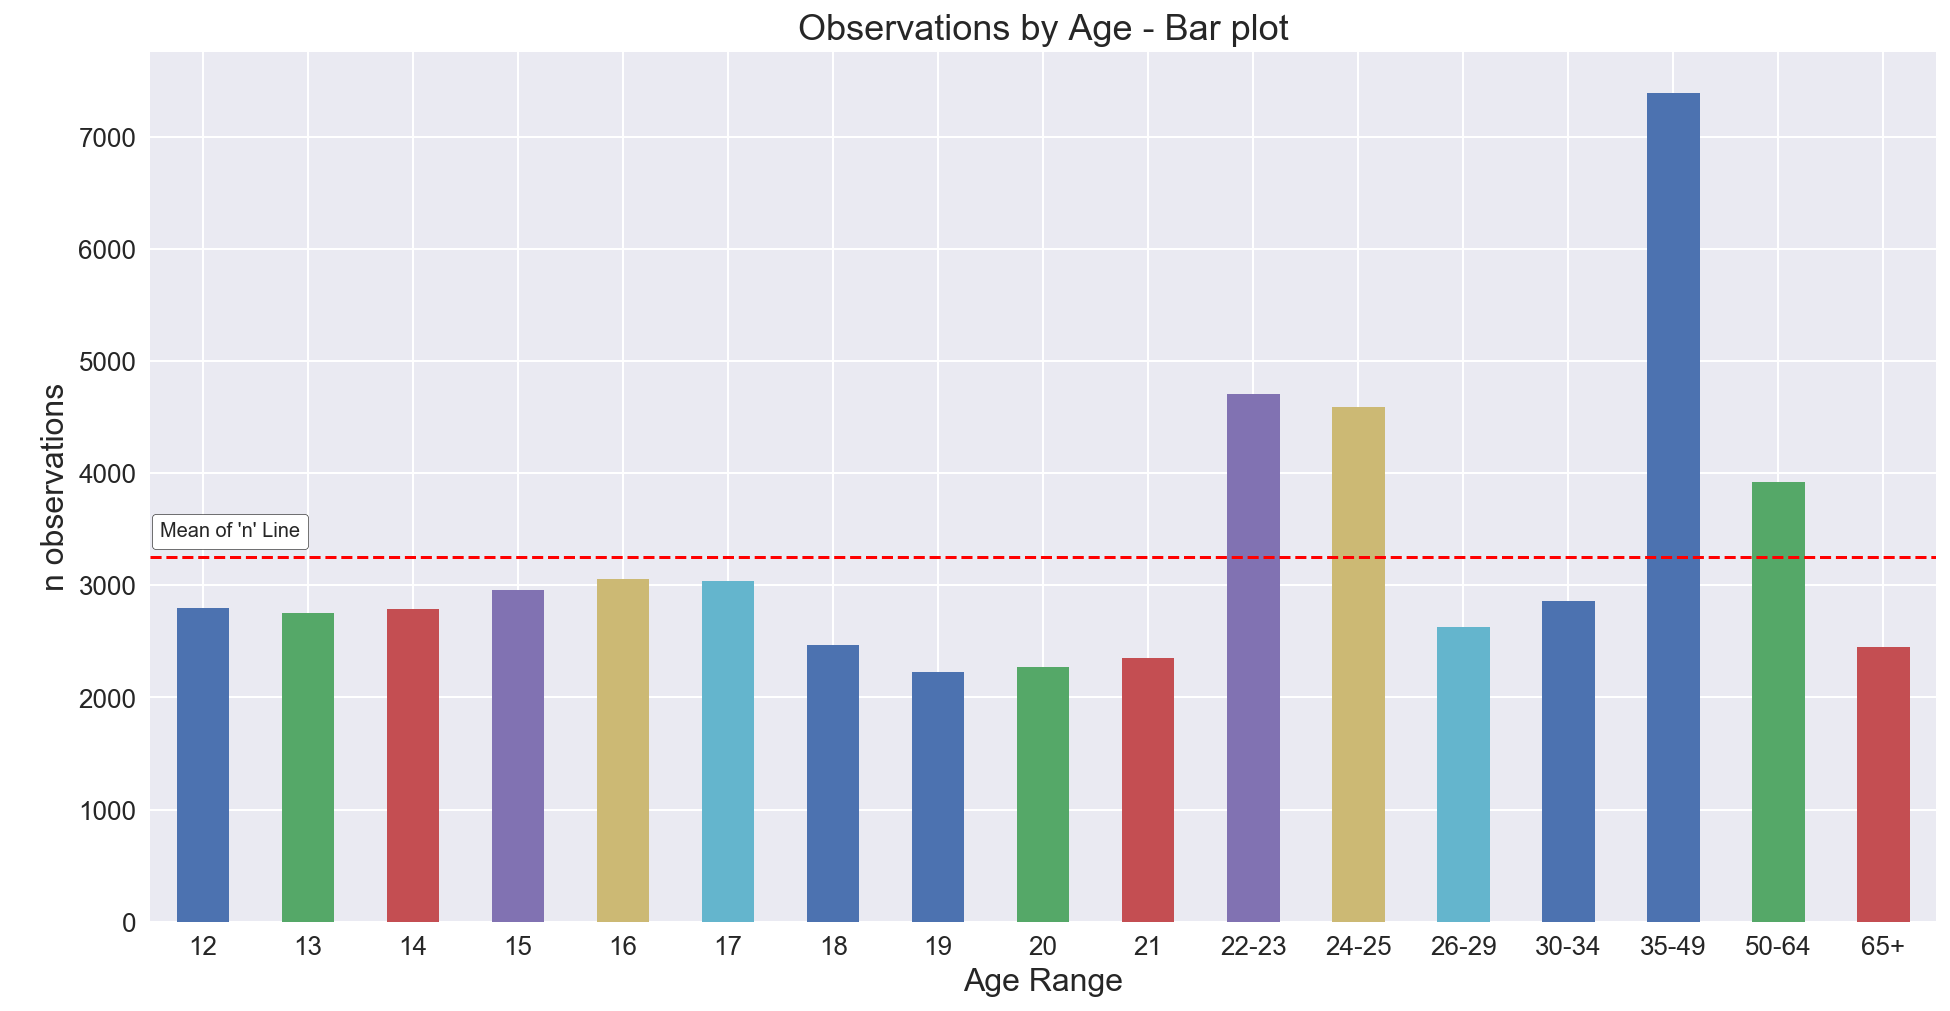

In [50]:
#BARPLOT FOR N ON AGE
x = df_drugs_freq.age.values
# create an index for each tick position
xi = [i for i in range(0, len(x))]

#colorset = ['fuchsia','orange','gold','sienna','green','dodgerblue','seagreen','turquoise','skyblue','salmon','mediumpurple','red','royalblue']
ax = df_drugs['n'].plot(kind='bar', figsize=(16,8))
plt.xticks(xi, x)
#ax.legend(loc='upper left', prop={'size': 16}, labels=df_drugs_freq.columns.str.replace('frequency',''))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation='horizontal')
ax.set_title('Observations by Age - Bar plot', fontsize=18)
ax.set_xlabel('Age Range', fontsize=16)
ax.set_ylabel('n observations',fontsize=16)
#Mean Line
plt.axhline(y=df_drugs['n'].mean(), linewidth=1.5, color = 'red', ls="--", )

from matplotlib.offsetbox import AnchoredText
at = AnchoredText("Mean of 'n' Line",
                  prop=dict(size=10), frameon=True,
                  loc=6,bbox_to_anchor=(142, 480),
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

### Lastly...
##### Data might have some bias as the amount of observations are higher for ages, 22-23, 24-25, 35-49, 50-64 as its above the mean.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### From the Drugs Frequency over Age, I spotted something 'interesting' with Meth and Heroin frequencies

Text(0,0.5,u'Frequency')

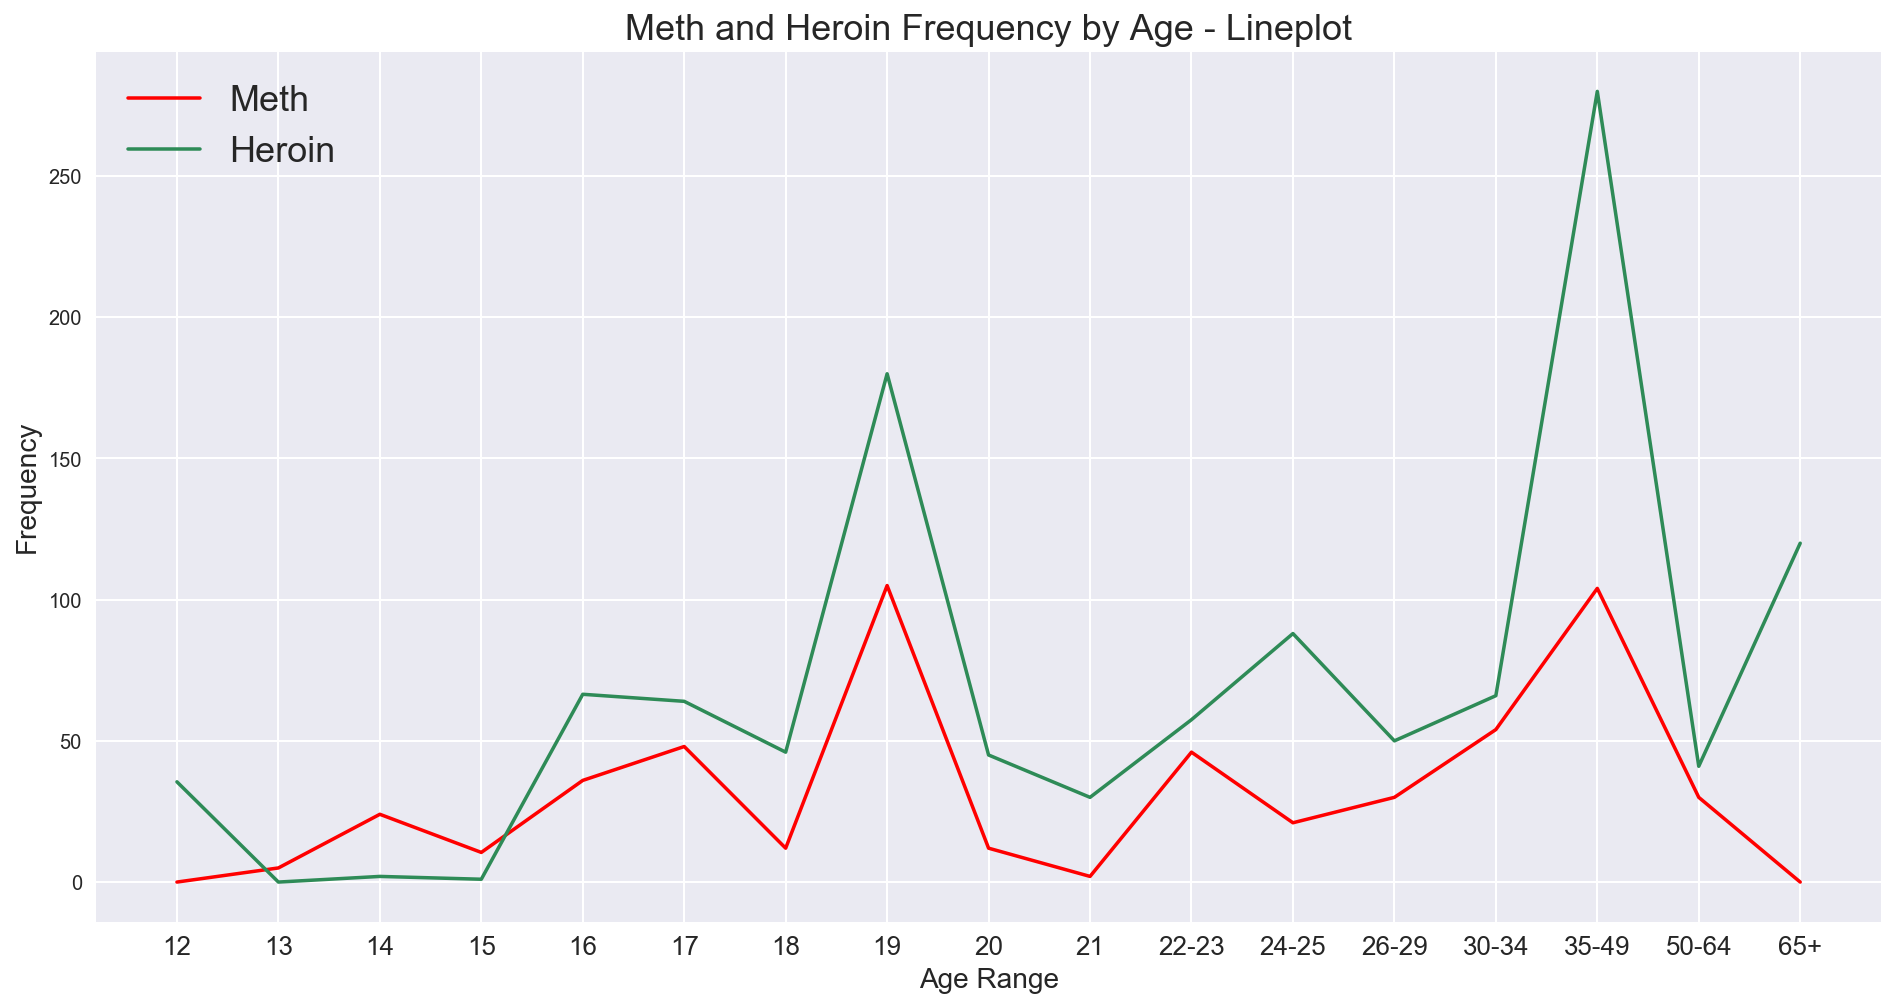

In [51]:
#LINEPLOT FOR DRUG FREQ ON AGE
x = df_drugs_freq.age.values
# create an index for each tick position
xi = [i for i in range(0, len(x))]

colorset = ['red','seagreen']
ax = df_drugs_freq[['methfrequency','heroinfrequency']].plot(figsize=(16,8), color=colorset)
plt.xticks(xi, x)
ax.legend(loc='upper left', prop={'size': 18}, labels=['Meth','Heroin'])

plt.xticks(fontsize=13)
ax.set_title('Meth and Heroin Frequency by Age - Lineplot', fontsize=18)
ax.set_xlabel('Age Range', fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

Text(0.5,0.98,u'Distributions of Meth and Heroin Fequencies')

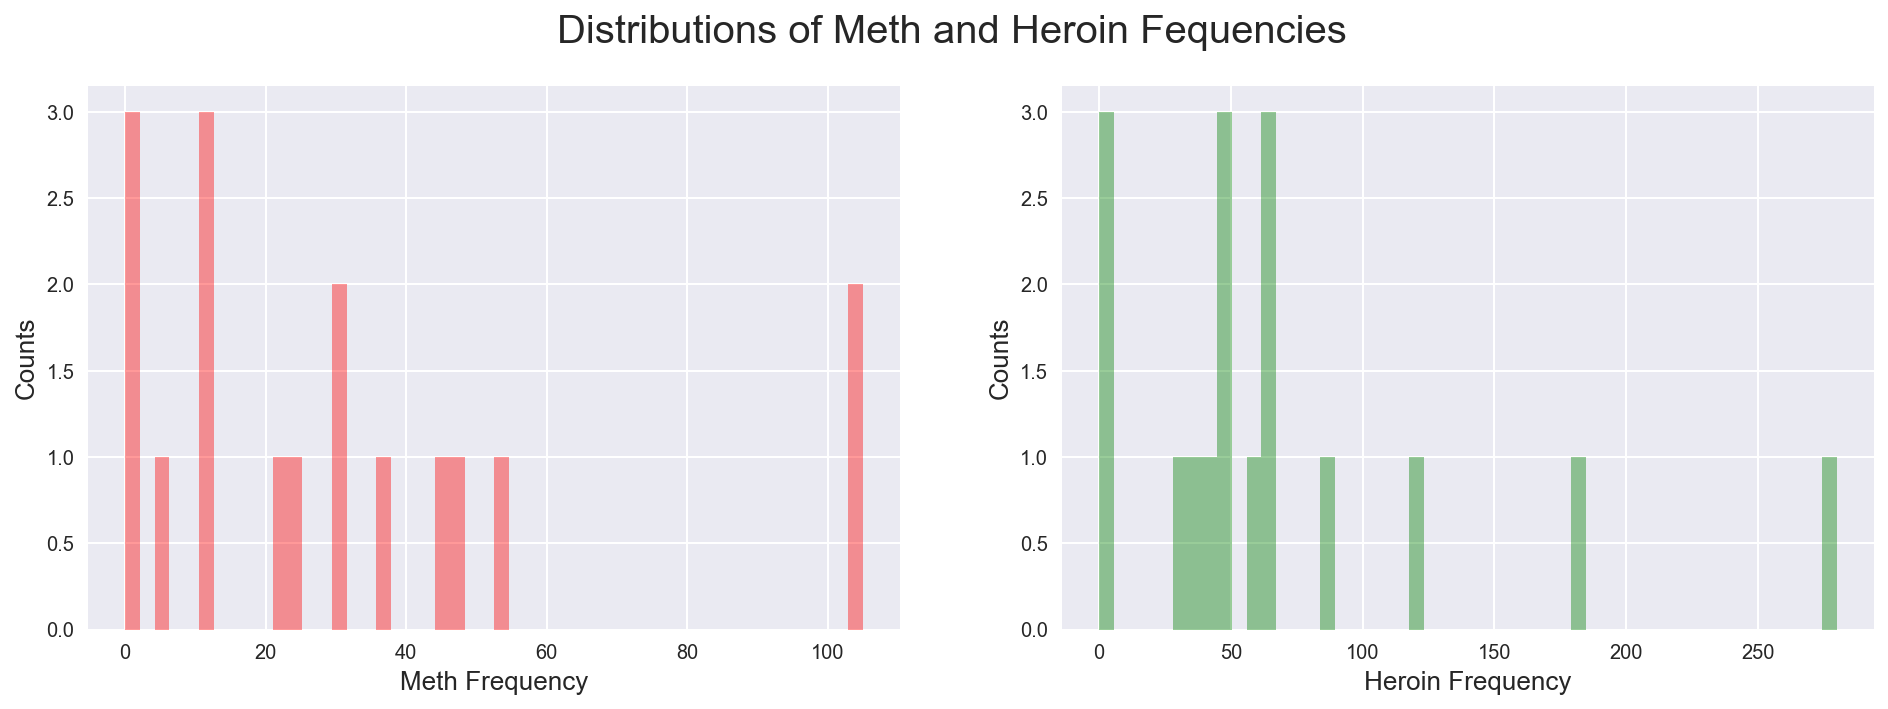

In [52]:
sns.set_style("ticks")
plt.style.use('seaborn-darkgrid')

figuresize = (16, 5)
fig, ax = plt.subplots(1,2, figsize=figuresize)
a1 = sns.distplot(df_drugs_freq['methfrequency'], bins=50, kde=False, ax=ax[0], color='red')
a1.set_xlabel('Meth Frequency', fontsize=13)
a1.set_ylabel('Counts', fontsize=13)

a2 = sns.distplot(df_drugs_freq['heroinfrequency'], bins=50, kde=False, ax=ax[1], color='green')
a2.set_xlabel('Heroin Frequency', fontsize=13)
a2.set_ylabel('Counts', fontsize=13)

plt.suptitle('Distributions of Meth and Heroin Fequencies', fontsize=20)

#### Meth and Heroin frequency distributions look similar...(Roughly, without standardization/normalization)

<h3><strong>Approach to the investigation:</strong></h3>
<p>Meth and Heroin seem to be taken in a similar frequency across age groups. They both have similar patterns across Age. Is there a likeliness that that when one takes Heroin, they do so with Meth?</p>
<p>What I want to find out:</p>
<p><strong>The Null Hypothesis:</strong></p>
<ul style="list-style-type: square;">
<li>H<sub>0</sub>: &micro; is that the Meth and Heroin frequencies are from the <span style="text-decoration: underline;">same</span> population. (<strong>Not</strong> statistically different)</li>
</ul>
<p><strong>The Alternate Hypothesis:</strong></p>
<ul style="list-style-type: square;">
<li>H<sub>A</sub>: &micro; is that the&nbsp;Meth and Heroin frequencies are from a <span style="text-decoration: underline;">different</span> population. (Statistically different)</li>
</ul>
<h3><strong>Methodology:</strong></h3>
<ol>
<li>We assume that the population is normal</li>
<li>Getting the values of Meth and Heroin Frequencies across the Ages</li>
<li>Performing a 2 Sample T-Test</li>
<li>By investing the T-statistic (<em>T</em>-Value) and the <em>P</em>-Value
<ul>
<li><span style="font-size: small;">T is simply the calculated difference represented in units of standard error. The greater the magnitude of T (it can be either positive or negative), the greater the evidence&nbsp;<em>against&nbsp;</em>the null hypothesis that there is no significant difference. The closer T is to 0, the more likely there isn't a significant difference.</span></li>
<li><span style="font-size: small;"><em>p</em>-value helps us determine the significance of your results. Benchmark is at 0.05</span>
<ul>
<li><span style="font-size: small;">A small&nbsp;<em>p</em>-value (typically &le; 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.</span></li>
<li><span style="font-size: small;">A large&nbsp;<em>p</em>-value (&gt; 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.</span></li>
</ul>
</li>
<li><span style="font-size: small;">The larger the absolute value of the t-value, the smaller the p-value, and the greater the evidence against the null hypothesis.</span></li>
</ul>
</li>
<li>Conclusion</li>
</ol>

In [53]:
stats.ttest_ind(df_drugs_freq['methfrequency'], df_drugs_freq['heroinfrequency'])

Ttest_indResult(statistic=-1.9888504859518115, pvalue=0.05532529094012566)

## T-statistic = -1.9888504859518115 with a P-value = 0.05532529094012566

### Report

<p>T-statistic = -1.9888504859518115</p>
<p>P-value = 0.05532529094012566.</p>
<p>Since our <em>p</em>-value is &gt; 0.05, it indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.</p>
<h2><span style="text-decoration: underline;"><strong>Conclusion</strong></span></h2>
<h3><strong>Meth and Heroin frequencies are from the&nbsp;same&nbsp;population.</strong></h3>
<p><em><strong>"If you take meth, you'd probably do heroin too.."</strong></em></p>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

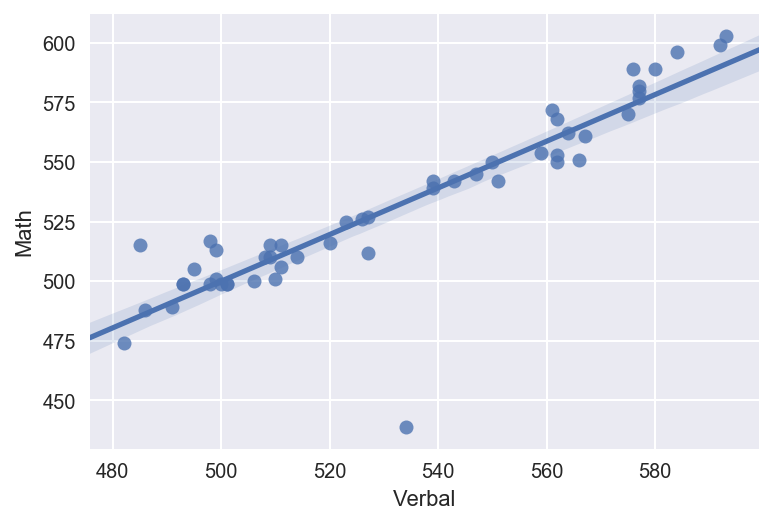

In [54]:
## DROP THE RATE COL
df_B = df.drop(['Rate'], axis=1)

#df_B.plot(kind='scatter', x='Verbal', y='Math')
ax = sns.regplot(x="Verbal", y="Math", data=df_B)

In [55]:
df_B.describe()

,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000
mean,532.529412,531.843137,0.686275
std,33.360667,36.287393,15.839811
min,482.000000,439.000000,-30.000000
25%,501.000000,503.000000,-6.000000
50%,527.000000,525.000000,0.000000
75%,562.000000,557.500000,4.500000
max,593.000000,603.000000,95.000000


<h4 id="Outliers.-(Using-a-Box-Plot-visual-example)">Outliers. (Using a Box Plot visual example)</h4>
<ol>
<li><strong>Establish the Inter-quartile Range</strong>
<ul>
<li>From the describe() we can find the 25% (Q1 - first quartile) and the 75% (Q3 - third quartile)</li>
<li>By Q3 - Q1 we can find the IQR (Inter-Quartile Range)</li>
</ul>
</li>
<li><strong>Identifying Outliers</strong>
<ul>
<li>If the Data point is &lt; Q1 - ( 1.5 X IQR ) it is an&nbsp;<u>outlier</u></li>
<li>If the Data point is &gt; Q3 + ( 1.5 X IQR ) it is an&nbsp;<u>outlier<br /></u><u></u></li>
</ul>
</li>
</ol>
<img src='Outliers.png', align=left, style="width: 50%; height: 50%">

In [56]:
## OUTLIERS OF THE DATASET
Verbal_Q1 = df_B.Verbal.describe()[4]
Verbal_Q3 = df_B.Verbal.describe()[6]
Verbal_IQR = Verbal_Q3 - Verbal_Q1
Verbal_Lower = Verbal_Q1 - (1.5*Verbal_IQR)
Verbal_Upper = Verbal_Q3 + (1.5*Verbal_IQR)

Math_Q1 = df_B.Math.describe()[4]
Math_Q3 = df_B.Math.describe()[6]
Math_IQR = Math_Q3 - Math_Q1
Math_Lower = Math_Q1 - (1.5*Math_IQR)
Math_Upper = Math_Q3 + (1.5*Math_IQR)

## YIELDED NO RESULTS
print(df_B[df_B['Verbal'] < Verbal_Lower])
print(df_B[df_B['Verbal'] > Verbal_Upper])
print(df_B[df_B['Math'] < Math_Lower])
print(df_B[df_B['Math'] > Math_Upper])

Empty DataFrame
Columns: [State, Verbal, Math, Verbal - Math]
Index: []
Empty DataFrame
Columns: [State, Verbal, Math, Verbal - Math]
Index: []
Empty DataFrame
Columns: [State, Verbal, Math, Verbal - Math]
Index: []
Empty DataFrame
Columns: [State, Verbal, Math, Verbal - Math]
Index: []


Text(0,0.5,u'Features')

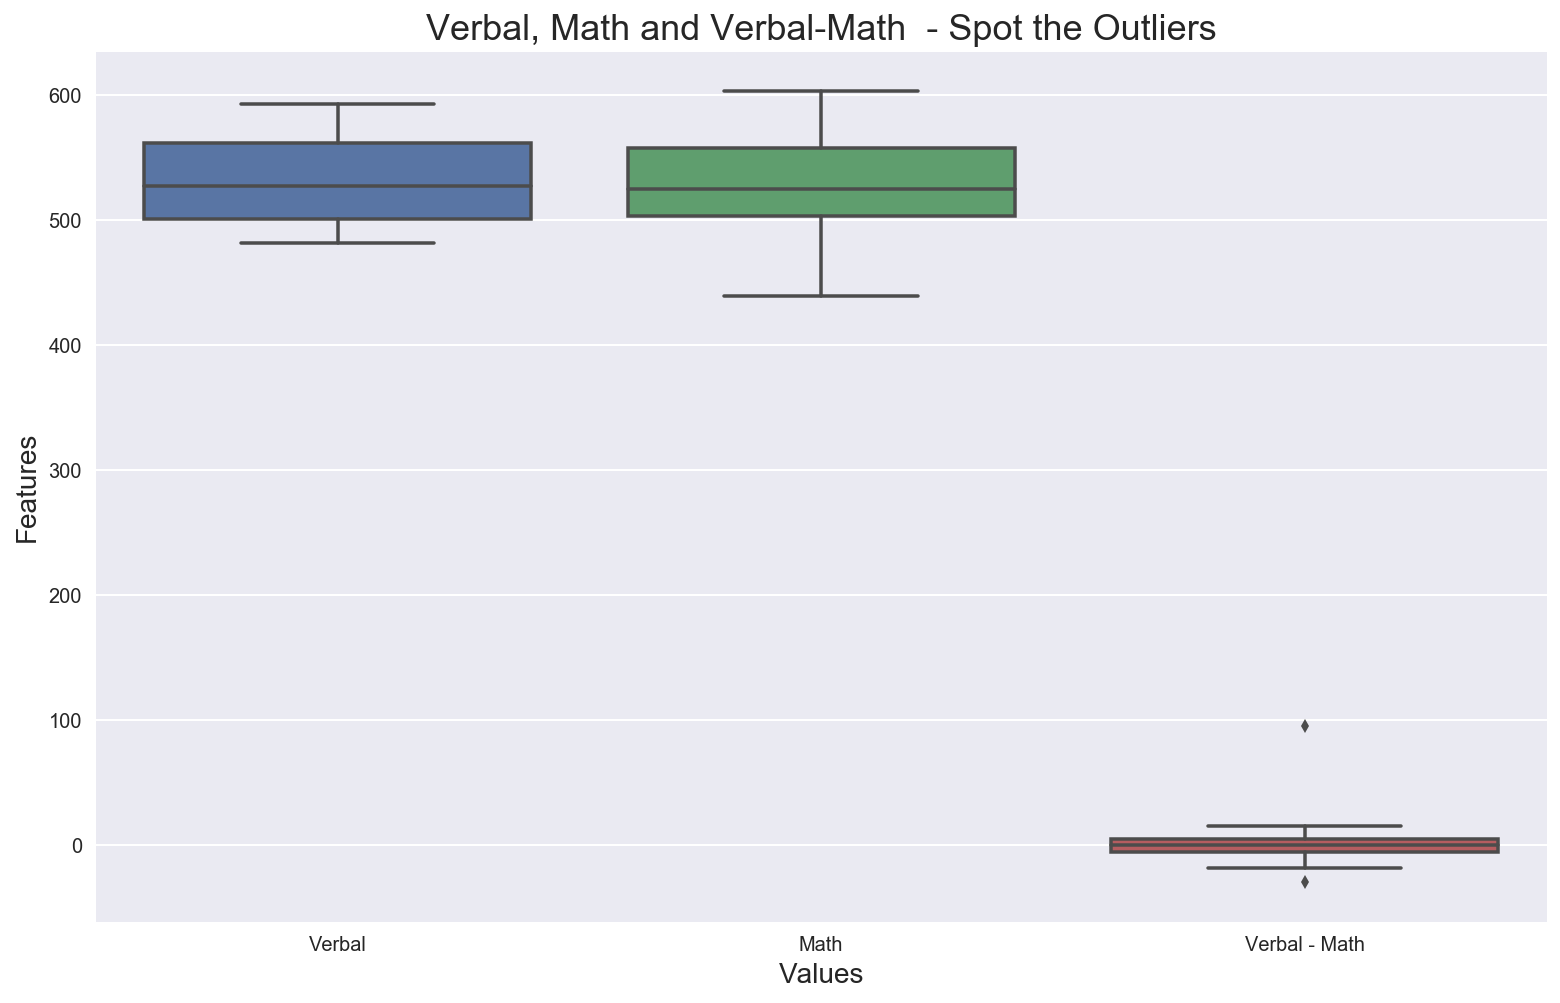

In [57]:
## LETS SEE A BOX PLOT

plt.figure(figsize=(13,8))
ax = sns.boxplot(data=df_B)

ax.set_title('Verbal, Math and Verbal-Math  - Spot the Outliers', fontsize=18)
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Features',fontsize=14)

In [58]:
Verbal_Math_Q1 = df_B['Verbal - Math'].describe()[4]
Verbal_Math_Q3 = df_B['Verbal - Math'].describe()[6]
Verbal_Math_IQR = Verbal_Math_Q3 - Verbal_Math_Q1
Verbal_Math_Lower = Verbal_Math_Q1 - (1.5*Verbal_Math_IQR)
Verbal_Math_Upper = Verbal_Math_Q3 + (1.5*Verbal_Math_IQR)

# print(df_B[df_B['Verbal - Math'] < Verbal_Math_Lower])
# print(df_B[df_B['Verbal - Math'] > Verbal_Math_Upper])

## IDENTIFY OUTLIERS
df_B_to_remove = df_B[(df_B['Verbal - Math'] < Verbal_Math_Lower) | (df_B['Verbal - Math'] > Verbal_Math_Upper)]

df_B_to_remove

,State,Verbal,Math,Verbal - Math
21,HI,485,515,-30
27,OH,534,439,95


In [59]:
## REMOVAL OF OUTLIERS
df_B_outlier_removed = df_B.drop(df_B_to_remove.index, axis=0)

## CHECK FOR REMOVAL ## RETURNS NOTHING
df_B_outlier_removed[(df_B_outlier_removed['State'] == 'HI') | (df_B_outlier_removed['State'] == 'OH')]

,State,Verbal,Math,Verbal - Math


In [60]:
df_B.describe()

,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000
mean,532.529412,531.843137,0.686275
std,33.360667,36.287393,15.839811
min,482.000000,439.000000,-30.000000
25%,501.000000,503.000000,-6.000000
50%,527.000000,525.000000,0.000000
75%,562.000000,557.500000,4.500000
max,593.000000,603.000000,95.000000


In [61]:
df_B_outlier_removed.describe()

,Verbal,Math,Verbal - Math
count,49.000000,49.000000,49.000000
mean,533.469388,534.081633,-0.612245
std,33.336105,34.366188,7.395991
min,482.000000,474.000000,-19.000000
25%,501.000000,505.000000,-6.000000
50%,527.000000,526.000000,0.000000
75%,562.000000,561.000000,4.000000
max,593.000000,603.000000,15.000000


In [62]:
#df_B_diff = df_B.describe()-df_B_outlier_removed.describe()
df_B_diff = df_B_outlier_removed.describe()-df_B.describe()

df_B_diff

,Verbal,Math,Verbal - Math
count,-2.000000,-2.000000,-2.000000
mean,0.939976,2.238495,-1.298519
std,-0.024562,-1.921205,-8.443820
min,0.000000,35.000000,11.000000
25%,0.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,3.500000,-0.500000
max,0.000000,0.000000,-80.000000


Text(0,0.5,u'Features')

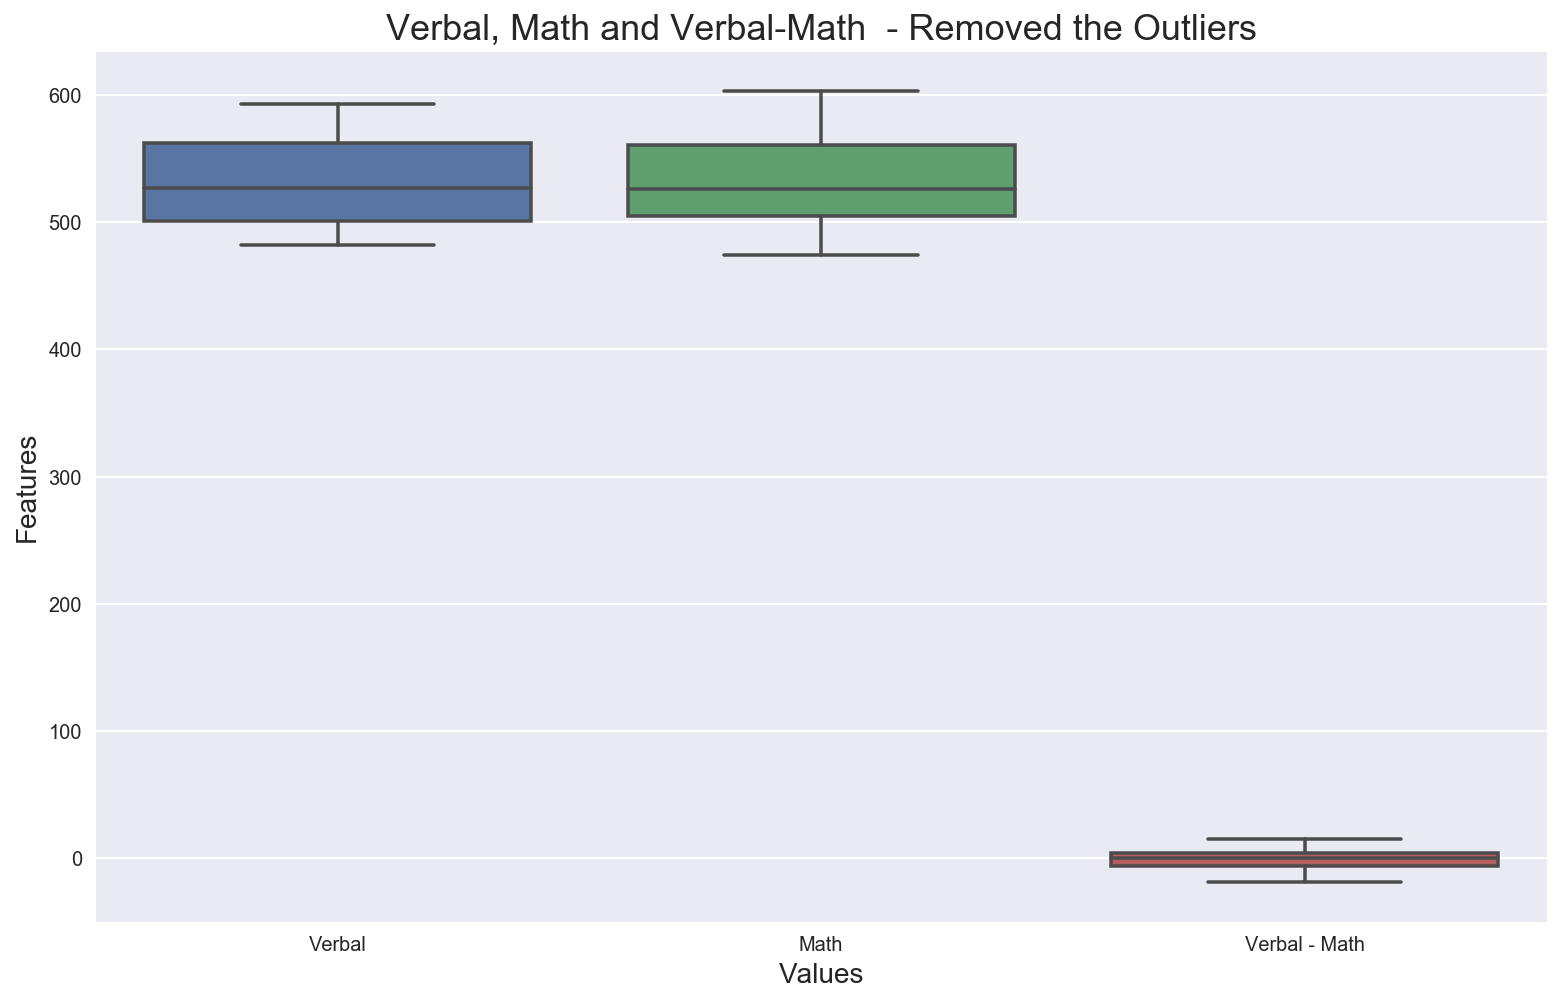

In [63]:
## LETS SEE A BOX PLOT

plt.figure(figsize=(13,8))
ax = sns.boxplot(data=df_B_outlier_removed)

ax.set_title('Verbal, Math and Verbal-Math  - Removed the Outliers', fontsize=18)
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Features',fontsize=14)

<h2>Differences:</h2>
<ol>
<li><strong>Mean</strong>: We see an increase in the means - The outliers had low Math and Verbal values</li>
<li><strong>Median</strong>: Math had a 1pt increase in the median - Data shift due to removal</li>
<li><strong>Std Dev</strong>: The std devs shifted as well, as there was a change in the mean</li>
</ol>

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<p>Spearman's Rank Correlation Coefficient (&rho;, also signified by&nbsp;<em>r</em><sub>s</sub>),&nbsp;<strong><span style="text-decoration: underline;">compares the ranks of 2 sets of data</span></strong>, <span style="text-decoration: underline;">not their values</span>. It measures the strength and direction of association between two ranked variables.</p>
<p>The Spearman rank correlation test is essentially the nonparametric version of the Pearson correlation coefficient test</p>
<p>Whereas the Pearson Correlation is a <span style="text-decoration: underline;">measure of the linear correlation between two variables</span>. It has a value between +1 and &minus;1, where 1 is total positive linear correlation, 0 is no linear correlation, and &minus;1 is total negative linear correlation.</p>
<p>For a Pearson correlation, each variable should be continuous. If one or both of the variables are ordinal in measurement, then a Spearman correlation could be conducted instead.</p>
<p>Both of them have different assumptions to work with.&nbsp;</p>
<p>Pearson's:&nbsp;The assumptions are as follows: related pairs, absence of outliers, normality of variables, linearity, and homoscedasticity (distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met.)</p>
<p>Spearman's:The assumptions are as follows: interval or ratio level or ordinal, monotonically related.</p>
<p>Monotinicity: (Left to Right)&nbsp;Monotonically increasing, Monotonically decreasing, Not monotonic</p>
<p>&nbsp;</p>
<p><img src='Monotonic.png', align=left, style="width: 50%; height: 50%"></p>
<ul>
<li>Monotonically increasing - as the x variable increases the y variable never decreases;</li>
<li>Monotonically decreasing - as the x variable increases the y variable never increases;</li>
<li>Not monotonic - as the x variable increases the y variable sometimes decreases and sometimes increases.</li>
</ul>
<p><strong>Spearman's interpretation</strong> is similar to that of Pearsons, e.g. the closer is to the stronger the monotonic relationship. Correlation is an effect size and so we can verbally describe the strength of the correlation using the following guide for the absolute value of :</p>
<ul>
<li>0.00-0.19 &ldquo;very weak&rdquo;</li>
<li>0.20-0.39 &ldquo;weak&rdquo;</li>
<li>0.40-0.59 &ldquo;moderate&rdquo;</li>
<li>0.60-.79 &ldquo;strong&rdquo;</li>
<li>0.80-1.0 &ldquo;very strong&rdquo;</li>
</ul>

In [64]:
df_B[['Verbal', 'Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


In [65]:
from scipy.stats import spearmanr

spearmanr(df_B[['Verbal']],df_B[['Math']])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

<p>Spearman's Rank Correlation Coefficient (&rho;, also signified by&nbsp;<em>r</em><sub>s</sub>):</p>
<p>Only if all&nbsp;<em>n</em>&nbsp;ranks are&nbsp;<em>distinct integers (Does not have tied ranks)</em></p>
<p><img src='Spearman1.jpg', align=left, style="width: 50%; height: 50%"></p>

<img src=SpearmanCalc.png style="width: 50%; height: 50%">

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [66]:
from scipy import stats

f = lambda x: stats.percentileofscore(df['Rate'], x)
df['Percentiles'] = df['Rate'].apply(f)

In [67]:
df[df['State'] == 'CA']

,State,Rate,Verbal,Math,Verbal - Math,Percentiles
23,CA,51,498,517,-19,55.882353


#### How is percentile related to the spearman rank correlation?
##### It is related as it is similar to the pearson correlation using the standard deviations to 'normalize' data to a range. The percentiles follow suite to the ranking done for Spearman's prior to calculation

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

<p><b><u>1: Why might percentile scoring be useful for dealing with outliers?</u></b></p>
<p>A challenge in measuring correlation is that the variables we want to compare might not be expressed in the same units. For example, height might be in centimeters and weight in kilograms. And even if they are in the same units, they come from different distributions.</p>
<p>There are two common solutions to these problems:</p>
<ol class="enumerate" type="1">
<li class="li-enumerate">Transform all values to&nbsp;<strong>standard scores</strong>. This leads to the Pearson coefficient of correlation.</li>
<li class="li-enumerate">Transform all values to their percentile ranks. This leads to the Spearman coefficient.</li>
</ol>
<p>If&nbsp;<em>X</em>&nbsp;is a series of values,&nbsp;<em>x<sub>i</sub></em>, we can convert to standard scores by subtracting the mean and dividing by the standard deviation: z<em><sub>i</sub></em>&nbsp;=&nbsp;(x<em><sub>i</sub></em>&nbsp;&minus;&nbsp;&micro;) / &sigma;.</p>
<p>The numerator is a deviation: the distance from the mean. Dividing by &sigma;&nbsp;<strong>normalizes</strong>&nbsp;the deviation, so the values of&nbsp;<em>Z</em>&nbsp;are dimensionless (no units) and their distribution has mean 0 and variance 1.</p>
<p>If&nbsp;<em>X</em>&nbsp;is normally-distributed, so is&nbsp;<em>Z</em>; but if&nbsp;<em>X</em>&nbsp;is skewed or has outliers, so does&nbsp;<em>Z</em>. In those cases it is more robust to use percentile ranks. <strong>If&nbsp;<em>R&nbsp;</em>contains the percentile ranks of the values in&nbsp;<em>X</em>, the distribution of&nbsp;<em>R&nbsp;</em>is uniform between 0 and 100, regardless of the distribution of&nbsp;<em>X</em>.</strong></p>

#### 2: Plot the distribution of a variable of your choice from the drug use dataset.


Text(0,0.5,u'Count')

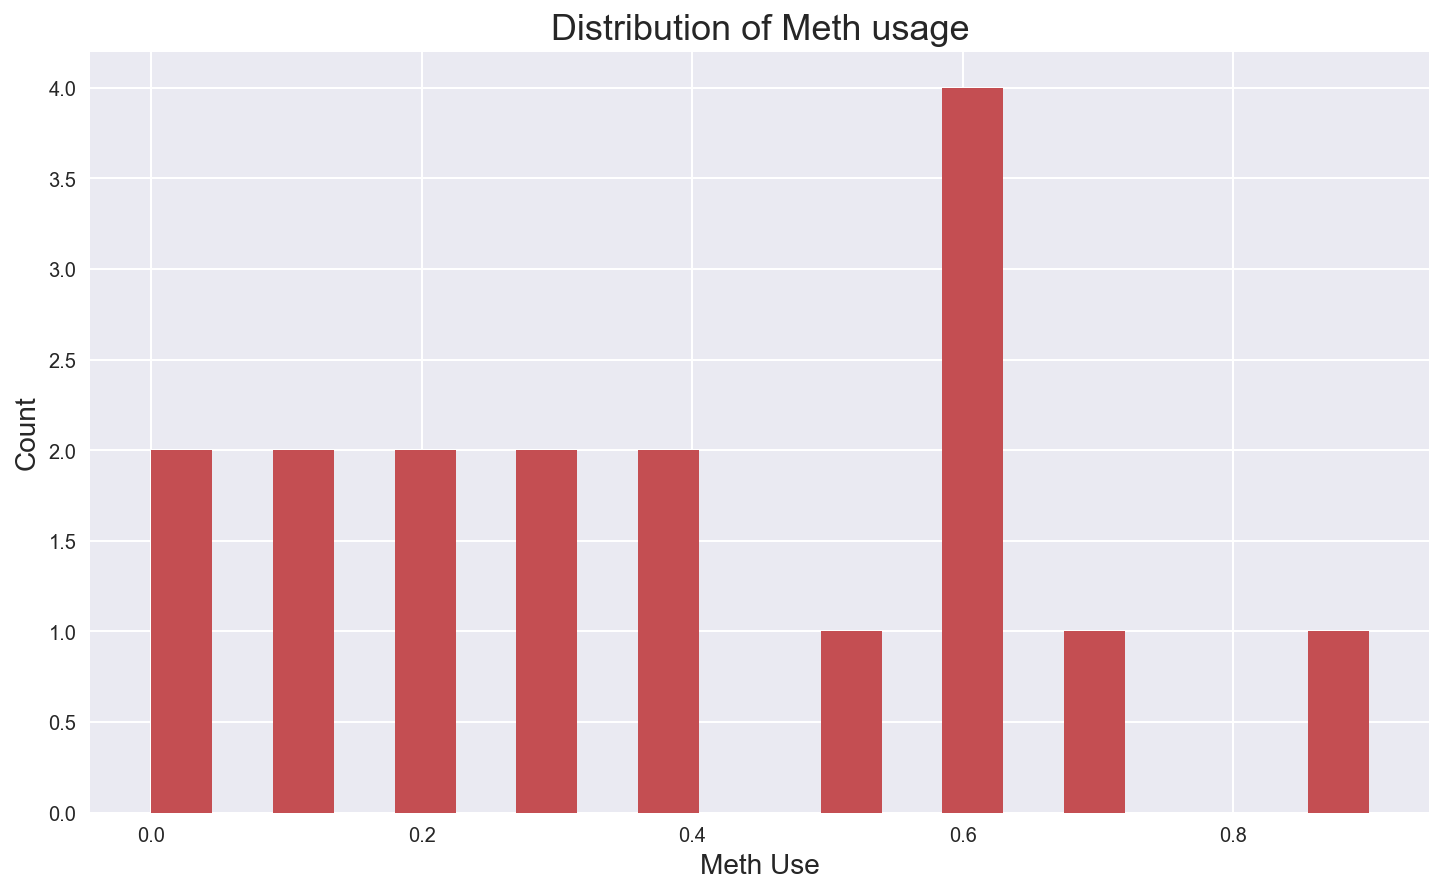

In [68]:
plt.figure(figsize=(12,7))
ax = sns.distplot(df_drugs_use[['methuse']], bins=20, kde=False, hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "r"})
ax.set_title('Distribution of Meth usage', fontsize=18)
ax.set_xlabel('Meth Use', fontsize=14)
ax.set_ylabel('Count',fontsize=14)

#### 3: Plot the same variable but percentile scored.

Text(0,0.5,u'Count')

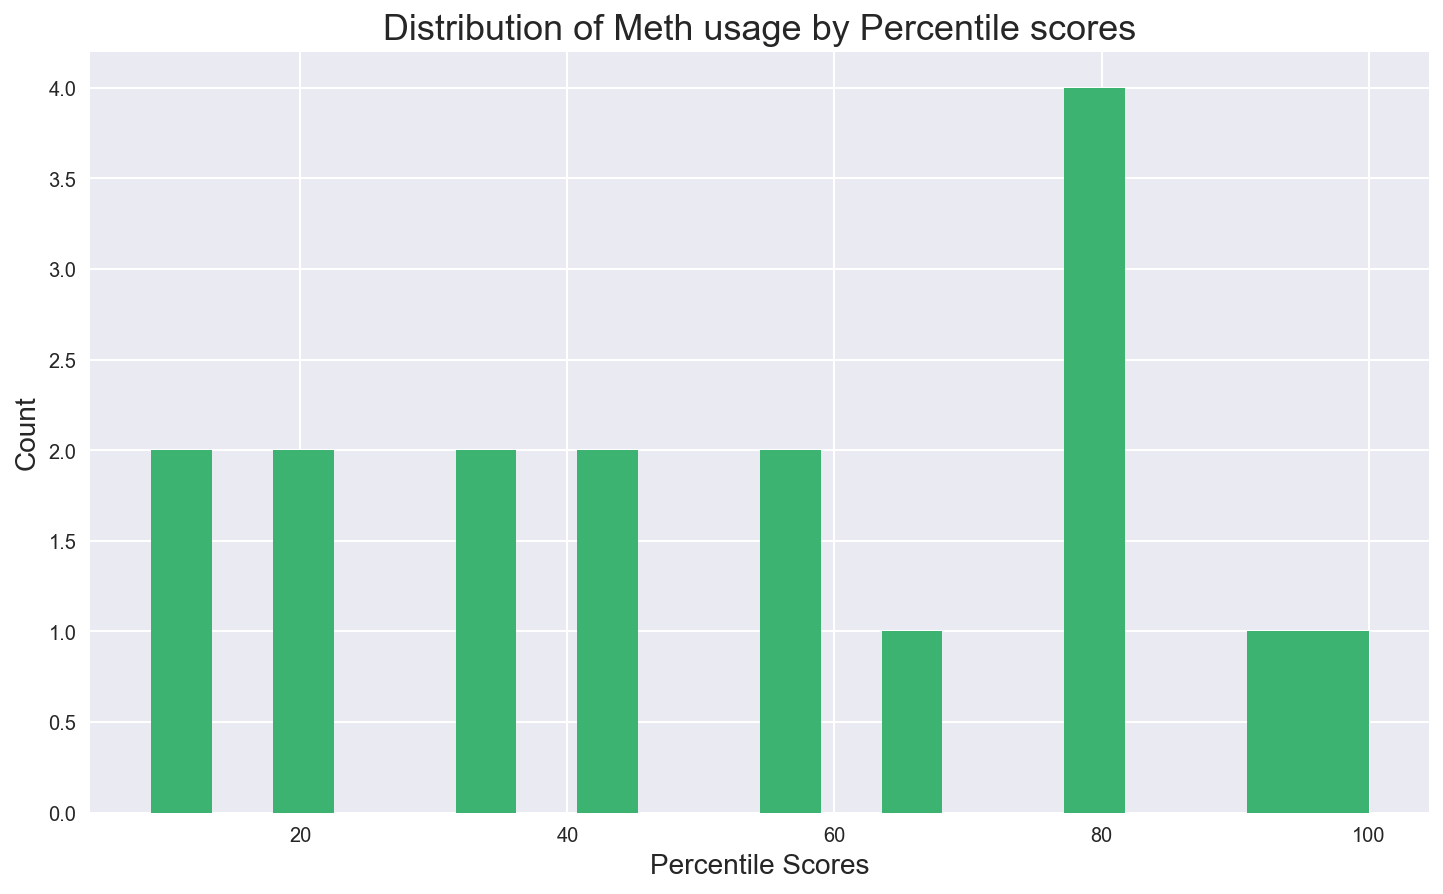

In [69]:
f = lambda x: stats.percentileofscore(df_drugs_use['methuse'], x)

plt.figure(figsize=(12,7))
ax = sns.distplot(df_drugs_use['methuse'].apply(f), bins=20, kde=False, hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "mediumseagreen"})
ax.set_title('Distribution of Meth usage by Percentile scores', fontsize=18)
ax.set_xlabel('Percentile Scores', fontsize=14)
ax.set_ylabel('Count',fontsize=14)

<b><u>4: Describe the effect, visually, of coverting raw scores to percentile.</u></b>
<p>By plotting the distribution on Percentile scores, the distribution's orginal values are standardized to 0%-100%.</p>
<p>At an immediate glance, you can see the percentiles of the values and counts.</p>